<a href="https://colab.research.google.com/github/Jdasanja/masers_thesis/blob/main/Exploratory_Data_Analysis_4_Multilabel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Heart Disease - UCI Machine Learning Repository </h1>**

The Heart Disease dataset, donated in 1988 to UC Irvine, includes data from four databases: Cleveland, Hungary, Switzerland, and the VA Long Beach. It is used for classification tasks in health and medicine, consisting of 303 instances and 13 main features, with mixed types (categorical, integer, and real values). Although the database has 76 total attributes, most research focuses on a subset of 14 attributes, especially from the Cleveland database. The goal attribute indicates the presence of heart disease on a scale from 0 (no presence) to 4, with studies typically aiming to differentiate between presence (1-4) and absence (0) of disease.

Key features include age, sex, chest pain type (cp), resting blood pressure (trestbps), serum cholesterol (chol), maximum heart rate (thalach), exercise-induced angina (exang), and ST depression (oldpeak). The data has missing values, and patients’ identification numbers and social security numbers have been anonymized. The introductory paper linked to this dataset is by Detrano et al. (1989), published in the American Journal of Cardiology.

  Note: I downloaded and uploaded the dataset from the <a href="https://archive.ics.uci.edu/dataset/45/heart+disease" target="_blank">Heart Disease - UCI Machine Learning Repository</a>, including all available data files.
    
  The dataset did not come with column headers, so I added them based on the order in which they appeared in the variable table on the UCI Machine Learning Repository website.
    
   For this project, I will initially focus on using only the <strong>processed.cleveland.data</strong> file.
    
  The data folder included a warning message:
    
  <blockquote>
      <strong>"The file cleveland.data was unfortunately corrupted when we lost node cip2 and transferred it to node ics. However, the file processed.cleveland.data appears to be intact and usable (for the 14 attributes). I will clean up cleveland.data as soon as possible.</strong>
        
  <strong>Bad news: my original copy of the database seems corrupted. I will need to contact the original data donor to obtain a new copy.</strong>
        
  <strong>David Aha"</strong>
 </blockquote>

In [1]:
# import pandas for reading and displaying local file
import pandas as pd

In [2]:
# Load the dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Jdasanja/masers_thesis/main/processed.cleveland.data'
df = pd.read_csv(url, header=None)

# Add column names (based on standard attribute names for the Cleveland dataset)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'num']

# Add a unique identifier column
df['patient_id'] = range(1, len(df) + 1)

# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)

# Display first few rows of the uploaded file with headers
print("First few rows of the uploaded file with column headers:")
print(df.head())

First few rows of the uploaded file with column headers:
             age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
patient_id                                                                  
1           63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
2           67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
3           67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
4           37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5           41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

            oldpeak  slope   ca thal  num  
patient_id                                 
1               2.3    3.0  0.0  6.0    0  
2               1.5    2.0  3.0  3.0    2  
3               2.6    2.0  2.0  7.0    1  
4               3.5    3.0  0.0  3.0    0  
5               1.4    1.0  0.0  3.0    0  


In [3]:
## Total count of missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [4]:
import numpy as np

## Replace question marks with NaN
df.replace('?', np.nan, inplace=True)

## Total count of missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
## Drop rows with NaN values
df.dropna(inplace=True)

## Verify if any null values remain
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df.drop(columns=['num'])

# Separate the target
y = df['num']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Performed a stratified split
# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable

In [7]:
# Explore the training set
print("DataFrame.info():")
X_train.info()

print("\nDataFrame.describe():")
print(X_train.describe())

DataFrame.info():
<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 302 to 282
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       237 non-null    float64
 1   sex       237 non-null    float64
 2   cp        237 non-null    float64
 3   trestbps  237 non-null    float64
 4   chol      237 non-null    float64
 5   fbs       237 non-null    float64
 6   restecg   237 non-null    float64
 7   thalach   237 non-null    float64
 8   exang     237 non-null    float64
 9   oldpeak   237 non-null    float64
 10  slope     237 non-null    float64
 11  ca        237 non-null    object 
 12  thal      237 non-null    object 
dtypes: float64(11), object(2)
memory usage: 25.9+ KB

DataFrame.describe():
              age         sex          cp    trestbps        chol         fbs  \
count  237.000000  237.000000  237.000000  237.000000  237.000000  237.000000   
mean    54.713080    0.696203    3.160338  132.337553  2

In [8]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
patient_id,,,,,,,,,,,,,
302,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0
83,39.0,1.0,3.0,140.0,321.0,0.0,2.0,182.0,0.0,0.0,1.0,0.0,3.0
179,43.0,1.0,3.0,130.0,315.0,0.0,0.0,162.0,0.0,1.9,1.0,1.0,3.0
250,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0
149,45.0,1.0,2.0,128.0,308.0,0.0,2.0,170.0,0.0,0.0,1.0,0.0,3.0


In [9]:
## Basic Descriptive
pd.set_option('display.float_format', lambda x: '%.3f' % x)
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,237.000,54.713,9.186,34.000,47.000,56.000,62.000,77.000
sex,237.000,0.696,0.461,0.000,0.000,1.000,1.000,1.000
cp,237.000,3.160,0.956,1.000,3.000,3.000,4.000,4.000
trestbps,237.000,132.338,17.954,94.000,120.000,130.000,140.000,200.000
chol,237.000,249.219,53.833,126.000,212.000,243.000,275.000,564.000
fbs,237.000,0.156,0.364,0.000,0.000,0.000,0.000,1.000
restecg,237.000,0.983,0.996,0.000,0.000,0.000,2.000,2.000
thalach,237.000,150.051,22.849,71.000,134.000,152.000,168.000,195.000
exang,237.000,0.346,0.477,0.000,0.000,0.000,1.000,1.000
oldpeak,237.000,1.060,1.165,0.000,0.000,0.800,1.800,6.200


In [10]:
X_train.shape

(237, 13)

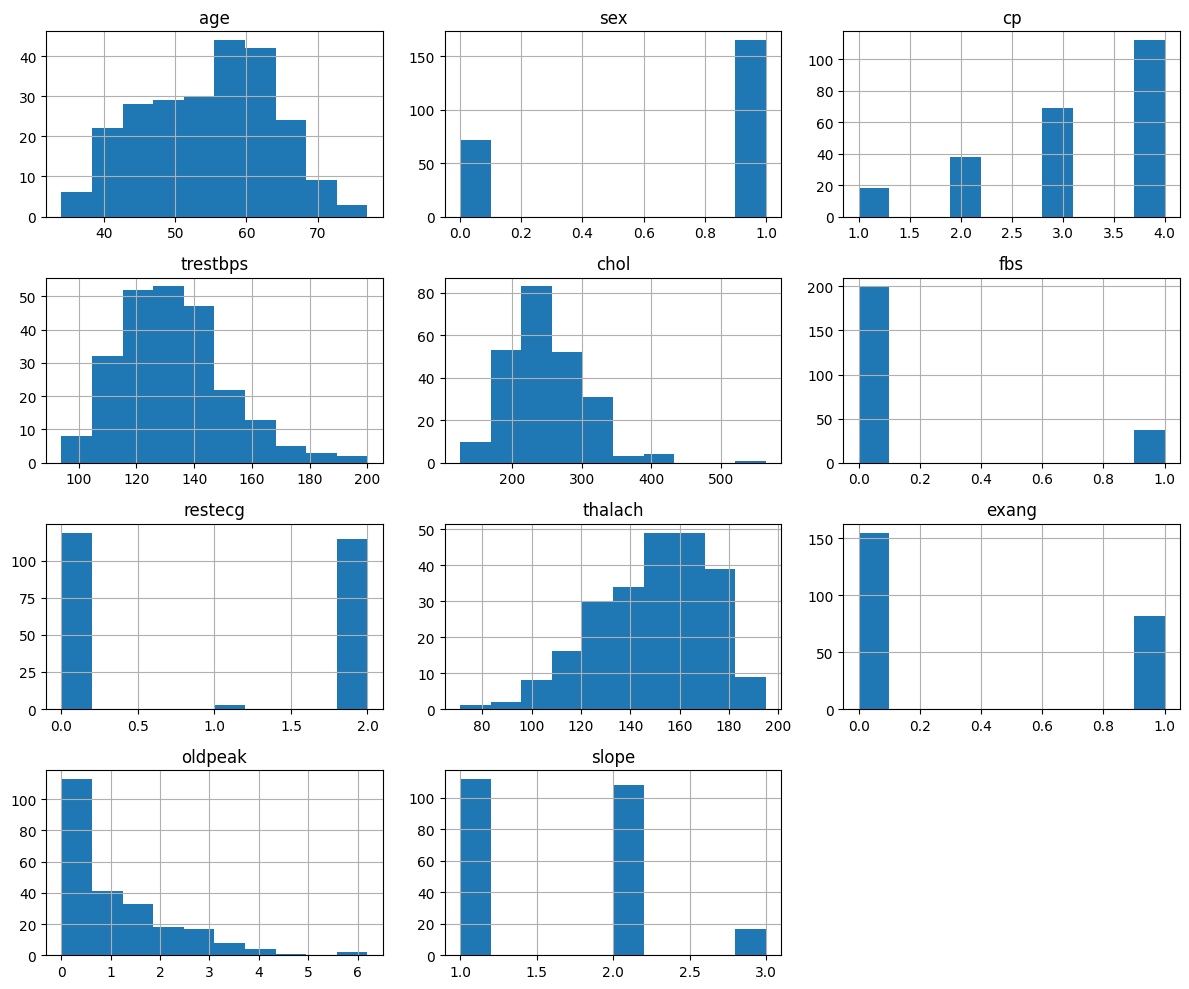

In [11]:
import matplotlib.pyplot as plt

#Histogram
X_train.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

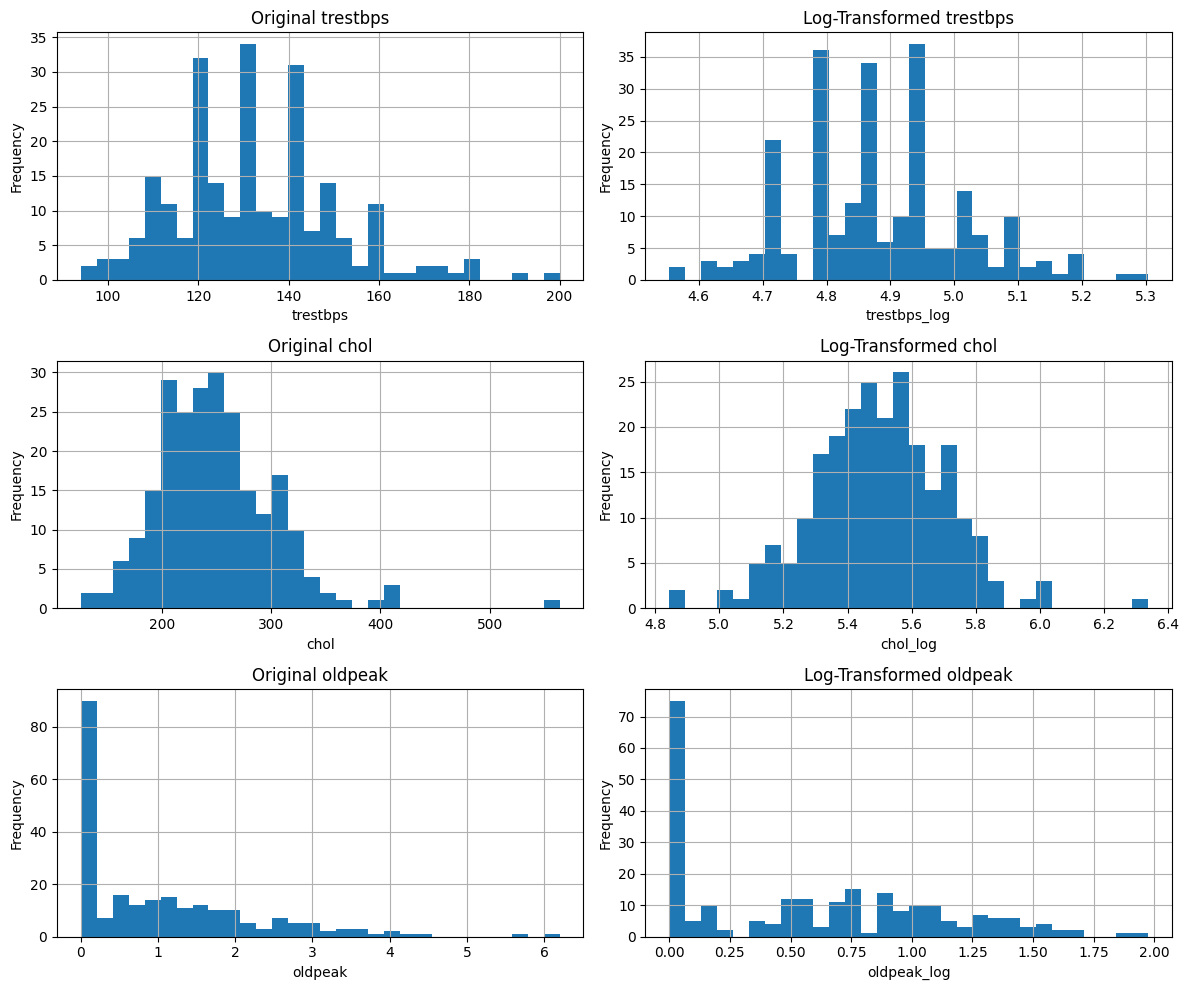

              age   sex    cp  trestbps    chol   fbs  restecg  thalach  \
patient_id                                                                
302        57.000 0.000 2.000   130.000 236.000 0.000    2.000  174.000   
83         39.000 1.000 3.000   140.000 321.000 0.000    2.000  182.000   
179        43.000 1.000 3.000   130.000 315.000 0.000    0.000  162.000   
250        62.000 1.000 2.000   128.000 208.000 1.000    2.000  140.000   
149        45.000 1.000 2.000   128.000 308.000 0.000    2.000  170.000   

            exang  oldpeak  slope   ca thal  trestbps_log  chol_log  \
patient_id                                                            
302         0.000    0.000  2.000  1.0  3.0         4.875     5.468   
83          0.000    0.000  1.000  0.0  3.0         4.949     5.775   
179         0.000    1.900  1.000  1.0  3.0         4.875     5.756   
250         0.000    0.000  1.000  0.0  3.0         4.860     5.342   
149         0.000    0.000  1.000  0.0  3.0     

In [12]:
import numpy as np


df_explore = X_train.copy()
# Assuming `df` is the DataFrame with the original data

# Continuous Variables: Apply log transformation
df_explore['trestbps_log'] = np.log(df_explore['trestbps'] + 1)
df_explore['chol_log'] = np.log(df_explore['chol'] + 1)
df_explore['oldpeak_log'] = np.log(df['oldpeak'] + 1)

# Set up a subplot grid for continuous variables
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 columns

# Continuous variables to compare
continuous_vars = ['trestbps', 'chol', 'oldpeak']

# Plot continuous variables
for i, var in enumerate(continuous_vars):
    # Original distribution
    df_explore[var].hist(ax=axes[i, 0], bins=30)
    axes[i, 0].set_title(f'Original {var}')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')

    # Log-transformed distribution
    df_explore[f'{var}_log'].hist(ax=axes[i, 1], bins=30)
    axes[i, 1].set_title(f'Log-Transformed {var}')
    axes[i, 1].set_xlabel(f'{var}_log')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check the resulting DataFrame
print(df_explore.head())


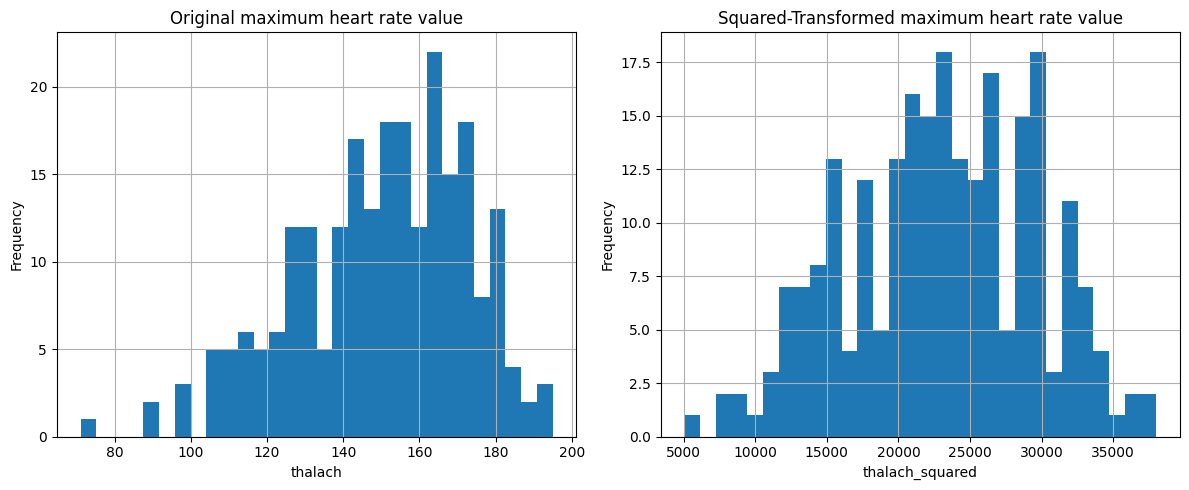

In [13]:
# Calculate and add 'thalach_squared' column to the DataFrame
df_explore['thalach_squared'] = df_explore['thalach'] ** 2  # Squaring the 'thalach' column
# Set up a subplot grid with only two charts (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted the grid size and figure size for two plots

# Plotting the original distribution of 'chol' (cholesterol)
df_explore['thalach'].hist(ax=axes[0], bins=30)
axes[0].set_title('Original maximum heart rate value')
axes[0].set_xlabel('thalach')
axes[0].set_ylabel('Frequency')

# Plotting the log-transformed distribution of 'chol'
#df['thalach_log'] = np.log(df['thalach'] + 1)  # Apply log transformation to avoid log(0) issues
df_explore['thalach_squared'].hist(ax=axes[1], bins=30)
axes[1].set_title('Squared-Transformed maximum heart rate value')
axes[1].set_xlabel('thalach_squared')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

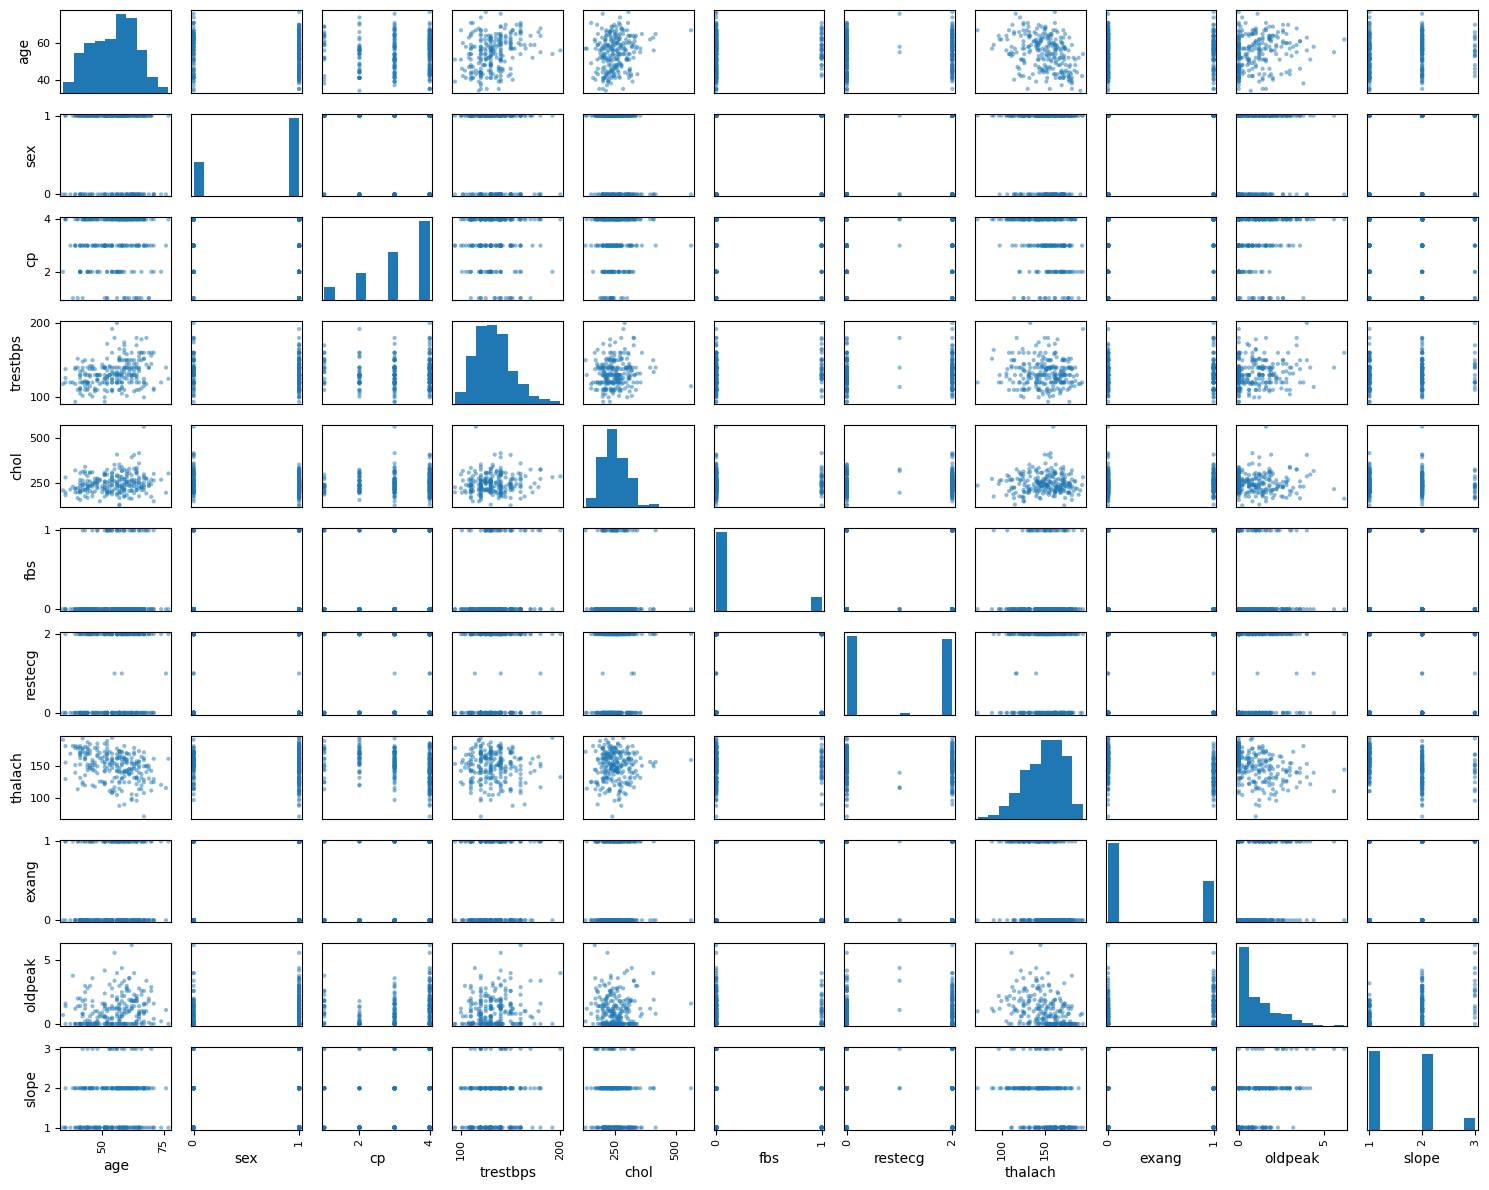

In [14]:
#import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


scatter_matrix(X_train, figsize=(15, 12))
plt.tight_layout()
plt.show()

<h1><strong>Distribution of Values by Heart Disease Severity</strong></h1>

In [15]:
# Merge X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Rename the target column (y_train) if necessary for clarity
train_data.rename(columns={'num': 'HeartDiseaseSeverity'}, inplace=True)

In [16]:
import pandas as pd

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

# Group by Heart Disease Severity and calculate summary statistics
distribution_summary = train_data.groupby('HeartDiseaseSeverity').describe()

# Display the distribution summary
print(distribution_summary)

# Reset display options to default after viewing
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

                         age                                                   \
                       count   mean    std    min    25%    50%    75%    max   
HeartDiseaseSeverity                                                            
0                    128.000 52.914  9.501 34.000 44.750 52.000 60.000 76.000   
1                     43.000 55.488  7.974 35.000 50.500 57.000 61.000 67.000   
2                     28.000 58.214  7.927 42.000 55.750 59.500 63.500 69.000   
3                     28.000 55.964  8.430 39.000 50.750 56.500 62.250 70.000   
4                     10.000 61.100 10.159 38.000 58.000 62.000 64.750 77.000   

                         sex                                            \
                       count  mean   std   min   25%   50%   75%   max   
HeartDiseaseSeverity                                                     
0                    128.000 0.586 0.494 0.000 0.000 1.000 1.000 1.000   
1                     43.000 0.837 0.374 0.000 1.000 1.

<h2><strong>Swarm Plots </h2></strong>

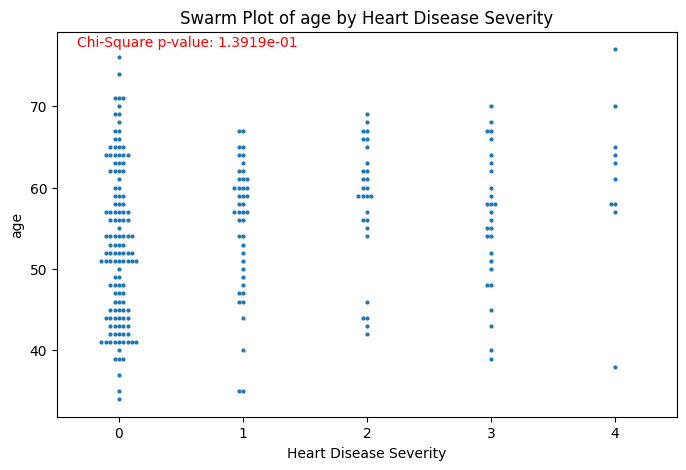

Chi-Square Test for age:
Chi2 Statistic: 175.2235, p-value: 1.3919e-01
----------------------------------------


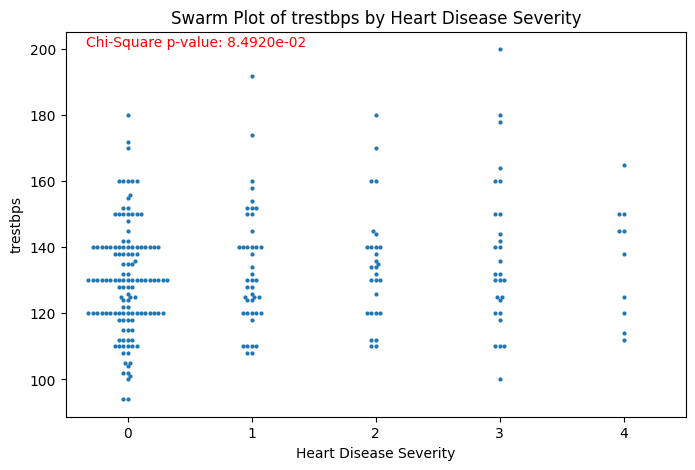

Chi-Square Test for trestbps:
Chi2 Statistic: 202.3023, p-value: 8.4920e-02
----------------------------------------


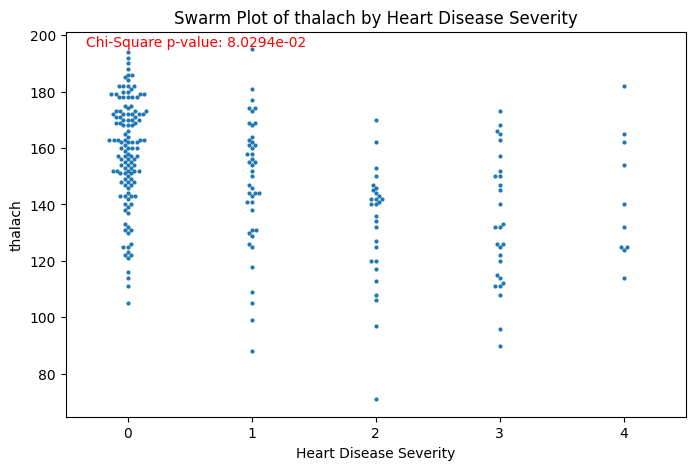

Chi-Square Test for thalach:
Chi2 Statistic: 372.9878, p-value: 8.0294e-02
----------------------------------------


In [17]:
from scipy.stats import chi2_contingency
import seaborn as sns

# List of columns to exclude
exclude_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'oldpeak','chol']

# Iterate only through columns not in exclude_columns
for column in [col for col in X_train.columns if col not in exclude_columns]:
    plt.figure(figsize=(8, 5))

    # Perform Chi-Square test
    contingency_table = pd.crosstab(train_data[column], train_data['HeartDiseaseSeverity'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Visualize the distribution using a swarm plot
    sns.swarmplot(data=train_data, x='HeartDiseaseSeverity', y=column, size=3)
    plt.title(f'Swarm Plot of {column} by Heart Disease Severity')
    plt.xlabel('Heart Disease Severity')
    plt.ylabel(column)

    # Add Chi-Square p-value to the plot
    plt.figtext(0.15, 0.85, f'Chi-Square p-value: {p:.4e}', fontsize=10, color='red')

    plt.show()

    # Print the test results in the console for reference
    print(f'Chi-Square Test for {column}:')
    print(f'Chi2 Statistic: {chi2:.4f}, p-value: {p:.4e}')
    print('-' * 40)

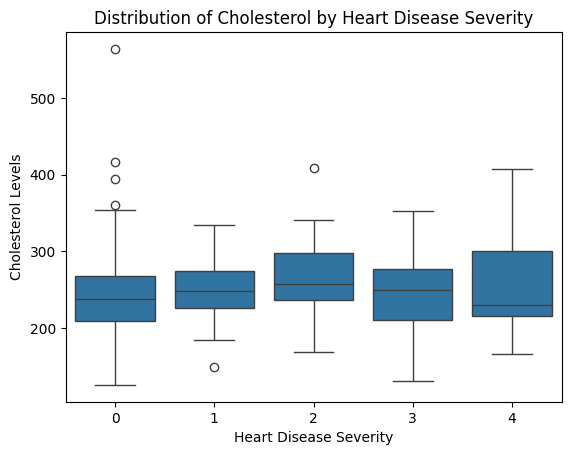

In [18]:
sns.boxplot(data=train_data, x='HeartDiseaseSeverity', y='chol')
plt.title('Distribution of Cholesterol by Heart Disease Severity')
plt.xlabel('Heart Disease Severity')
plt.ylabel('Cholesterol Levels')
plt.show()

In [19]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table for 'chol' and 'HeartDiseaseSeverity'
contingency_table = pd.crosstab(train_data['chol'], train_data['HeartDiseaseSeverity'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p:.4e}")

Chi-Square Test Results:
Chi2 Statistic: 599.6489
p-value: 4.9183e-02


<h2><strong>KDE Plot</h2></strong>

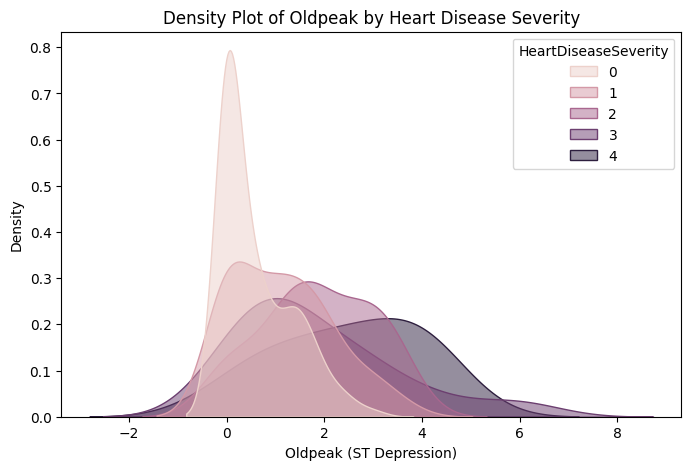

In [20]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=train_data, x='oldpeak', hue='HeartDiseaseSeverity', fill=True, common_norm=False, alpha=0.5)
plt.title('Density Plot of Oldpeak by Heart Disease Severity')
plt.xlabel('Oldpeak (ST Depression)')
plt.ylabel('Density')
plt.show()

In [21]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table for 'chol' and 'HeartDiseaseSeverity'
contingency_table = pd.crosstab(train_data['oldpeak'], train_data['HeartDiseaseSeverity'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p:.4e}")


Chi-Square Test Results:
Chi2 Statistic: 265.9173
p-value: 3.1087e-08


Chi-Square Test for sex:
Chi2 Statistic = 16.06180, p-value = 2.94e-03, Degrees of Freedom = 4
Significant association between sex and HeartDiseaseSeverity (p < 0.05).



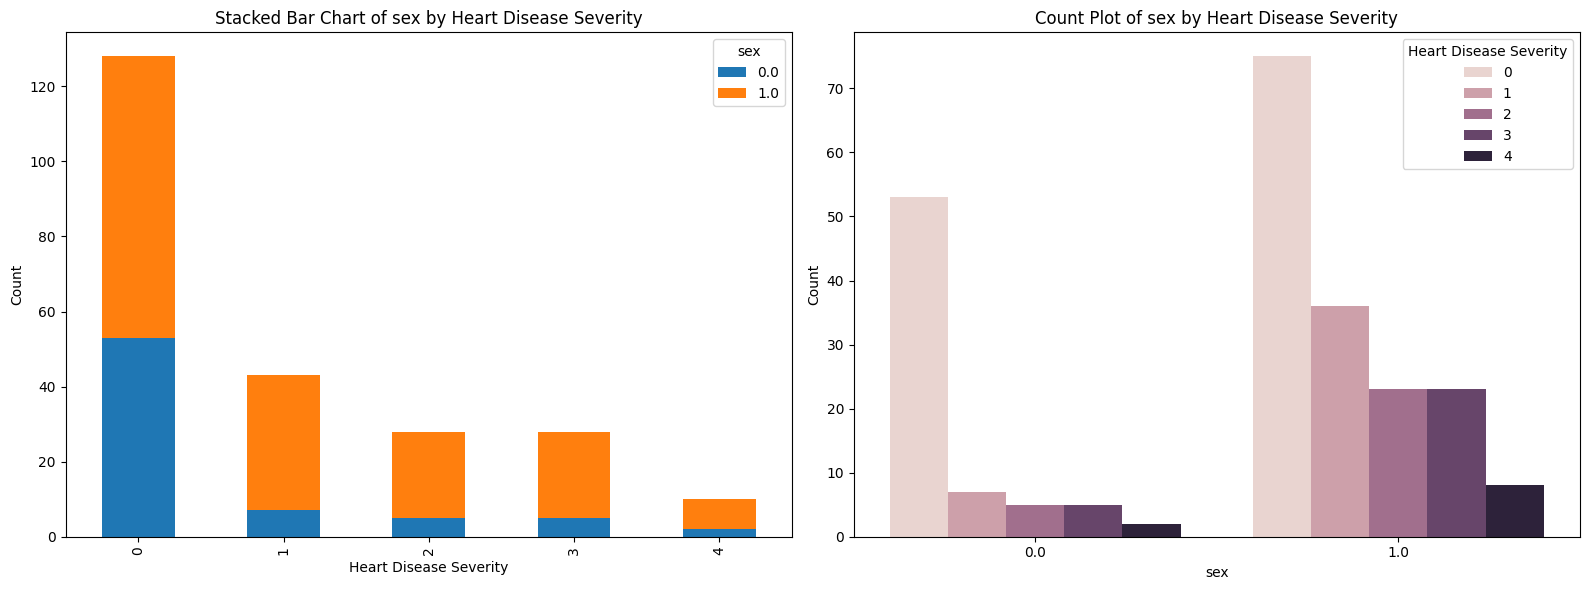

Chi-Square Test for cp:
Chi2 Statistic = 62.19298, p-value = 8.96e-09, Degrees of Freedom = 12
Significant association between cp and HeartDiseaseSeverity (p < 0.05).



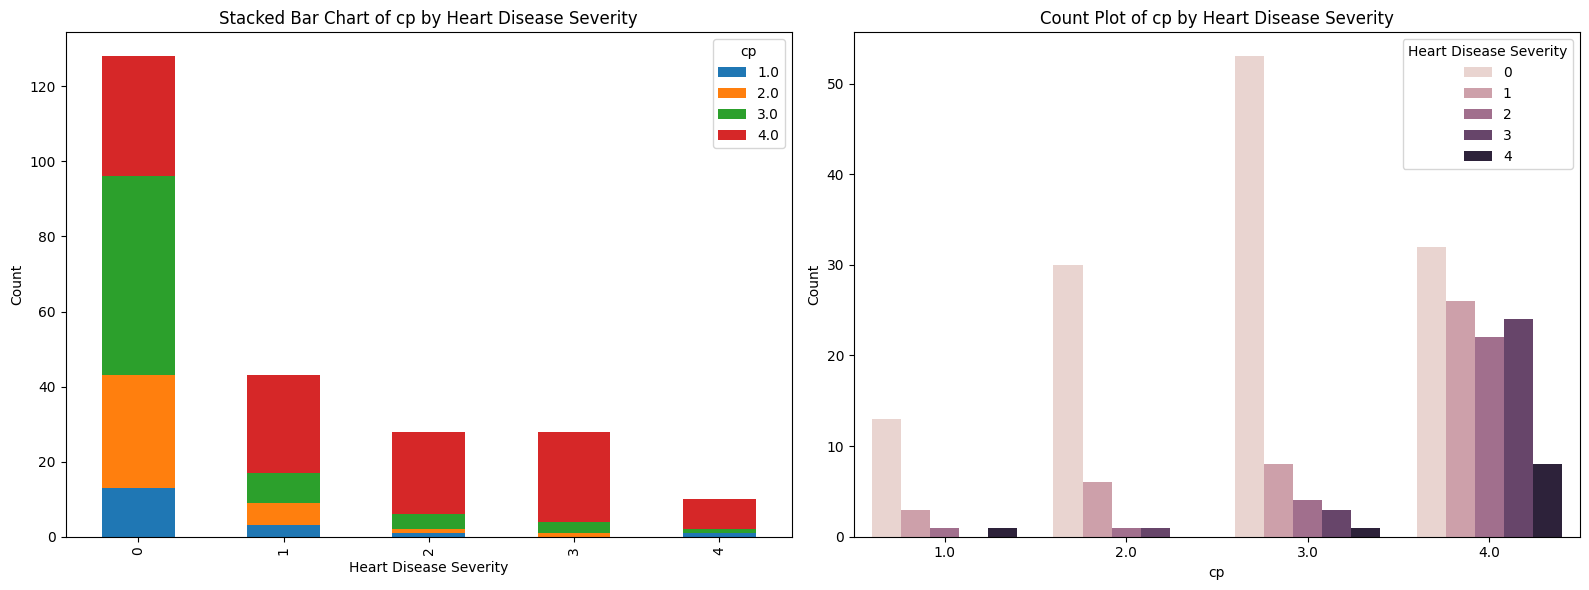

Chi-Square Test for fbs:
Chi2 Statistic = 6.34939, p-value = 1.75e-01, Degrees of Freedom = 4
No significant association between fbs and HeartDiseaseSeverity (p >= 0.05).



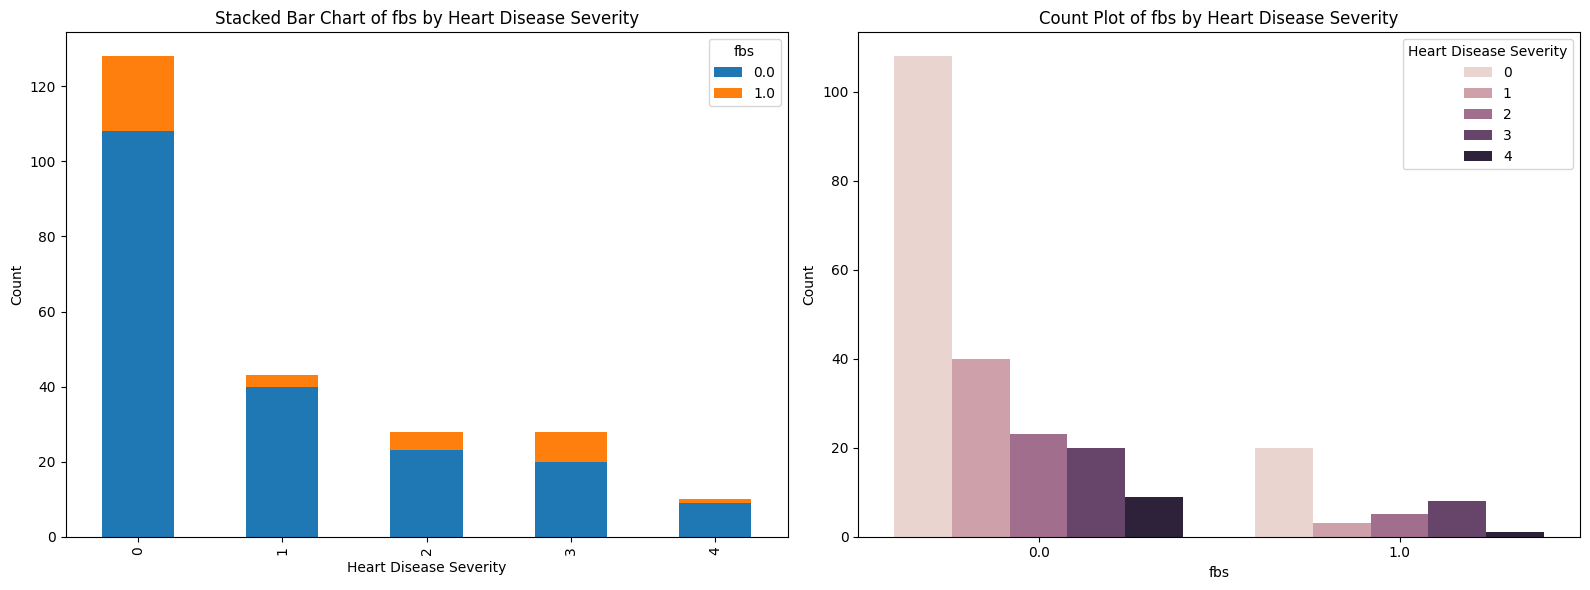

Chi-Square Test for restecg:
Chi2 Statistic = 18.59172, p-value = 1.72e-02, Degrees of Freedom = 8
Significant association between restecg and HeartDiseaseSeverity (p < 0.05).



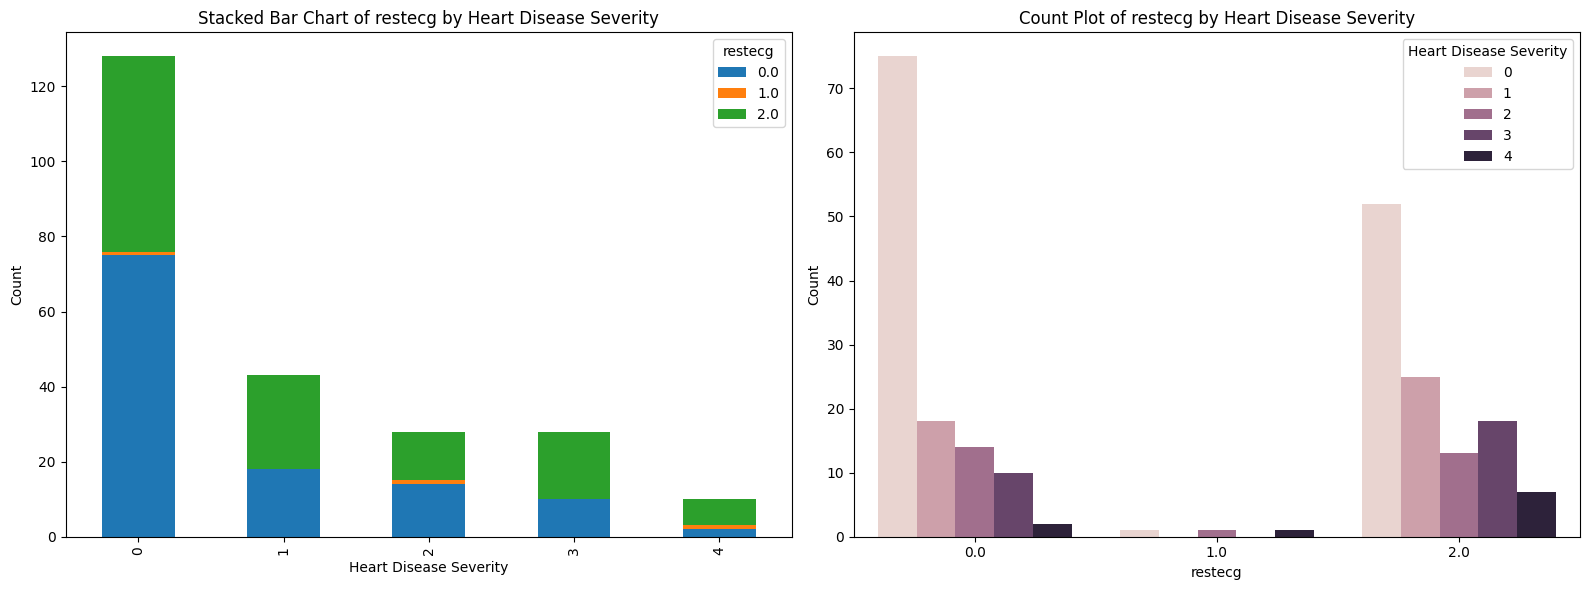

Chi-Square Test for exang:
Chi2 Statistic = 41.10577, p-value = 2.56e-08, Degrees of Freedom = 4
Significant association between exang and HeartDiseaseSeverity (p < 0.05).



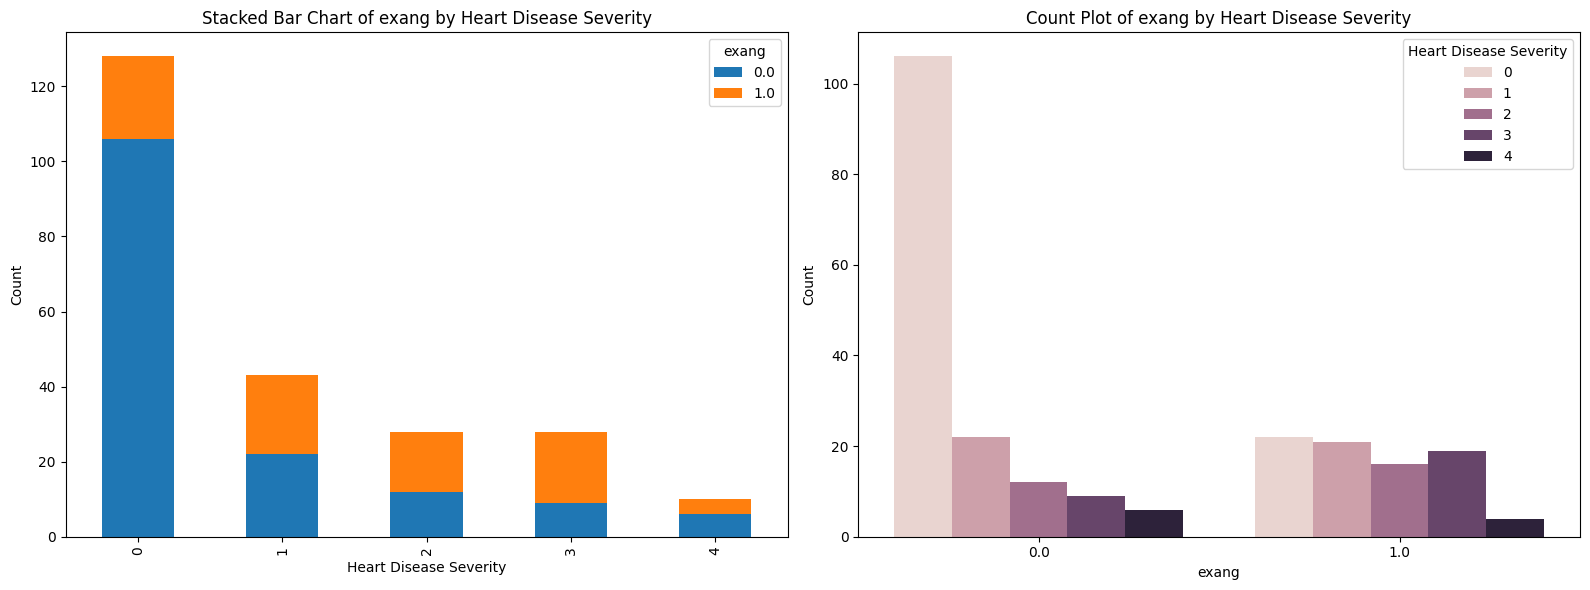

Chi-Square Test for slope:
Chi2 Statistic = 47.49468, p-value = 1.23e-07, Degrees of Freedom = 8
Significant association between slope and HeartDiseaseSeverity (p < 0.05).



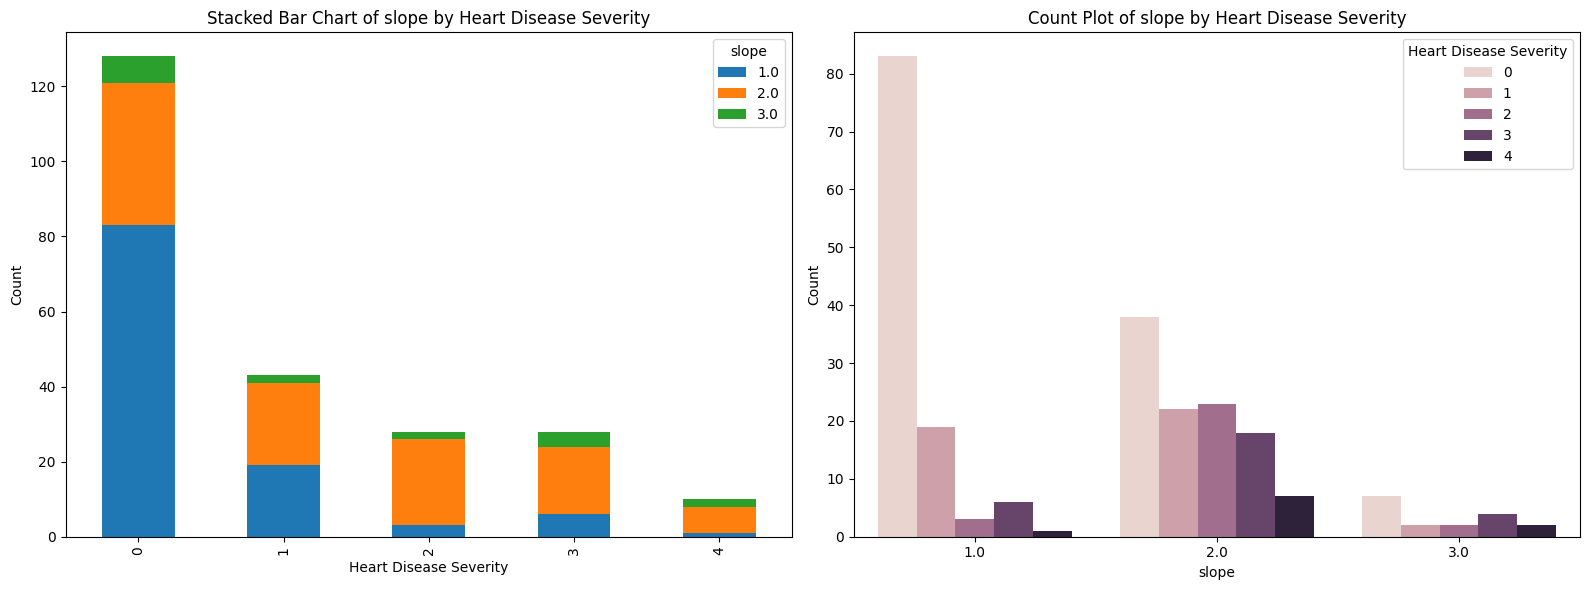

Chi-Square Test for ca:
Chi2 Statistic = 88.92972, p-value = 7.95e-14, Degrees of Freedom = 12
Significant association between ca and HeartDiseaseSeverity (p < 0.05).



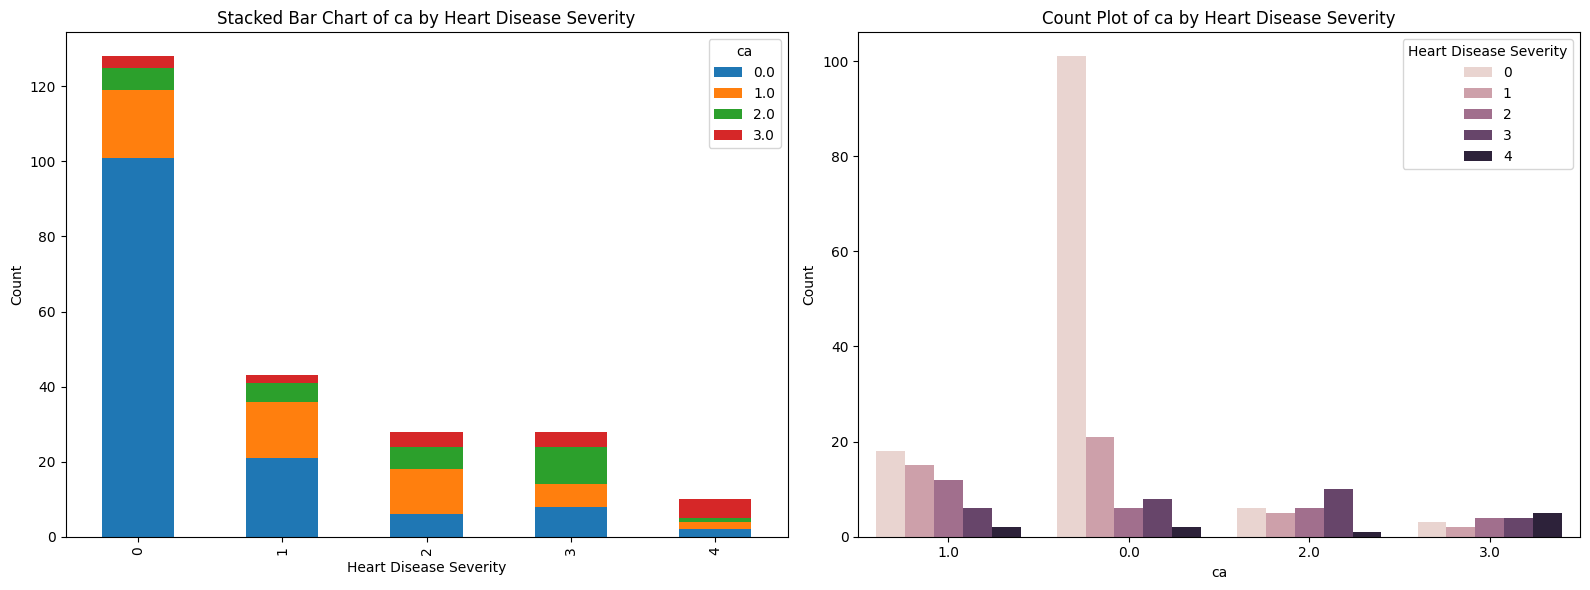

Chi-Square Test for thal:
Chi2 Statistic = 68.70416, p-value = 8.90e-12, Degrees of Freedom = 8
Significant association between thal and HeartDiseaseSeverity (p < 0.05).



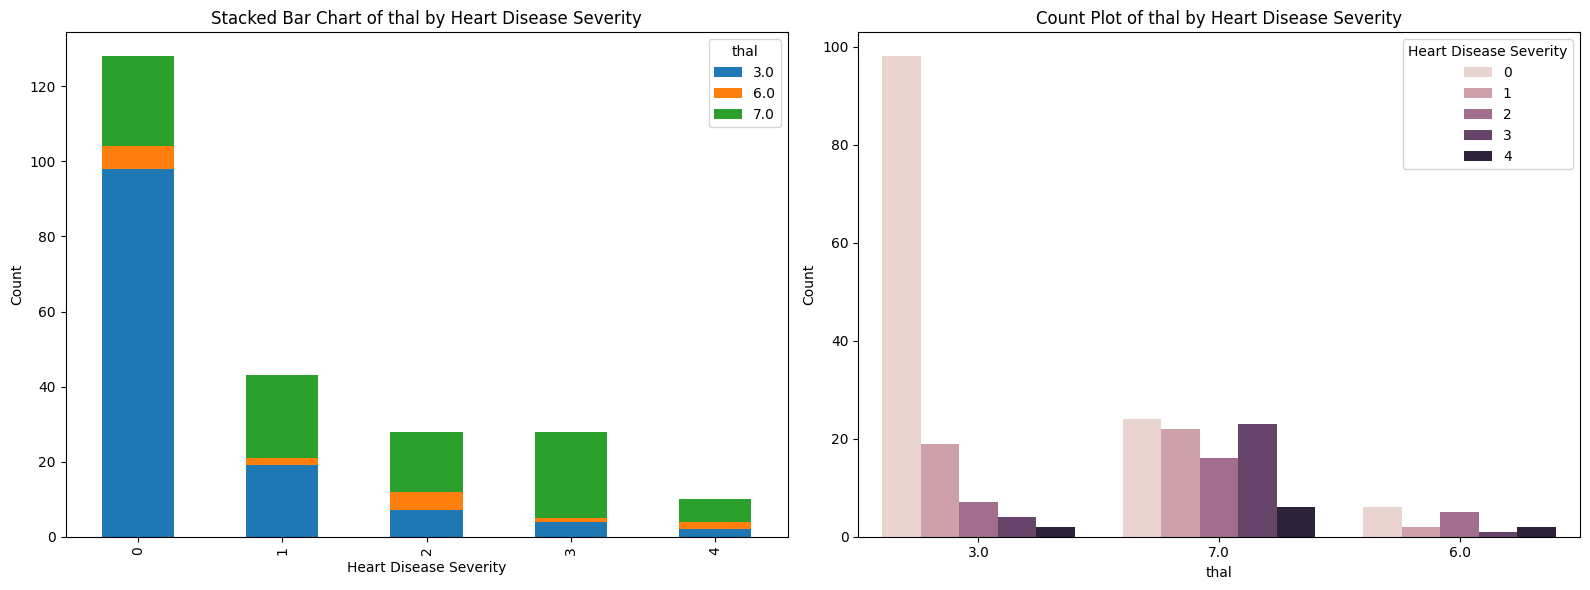

In [22]:
# Define the columns to analyze
columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']  # Replace with your actual column names
# Loop through each column to perform chi-square tests and display results
for column in columns:
    # Perform chi-square test
    contingency_table = pd.crosstab(train_data['HeartDiseaseSeverity'], train_data[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the chi-square test result with scientific notation for p-value
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2 Statistic = {chi2:.5f}, p-value = {p:.2e}, Degrees of Freedom = {dof}")
    if p < 0.05:
        print(f"Significant association between {column} and HeartDiseaseSeverity (p < 0.05).\n")
    else:
        print(f"No significant association between {column} and HeartDiseaseSeverity (p >= 0.05).\n")


    # Create a figure with side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Left plot: Stacked bar chart
    counts = train_data.groupby(['HeartDiseaseSeverity', column]).size().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, ax=axes[0])
    axes[0].set_title(f'Stacked Bar Chart of {column} by Heart Disease Severity')
    axes[0].set_xlabel('Heart Disease Severity')
    axes[0].set_ylabel('Count')
    axes[0].legend(title=column)

    # Right plot: Countplot
    sns.countplot(data=train_data, x=column, hue='HeartDiseaseSeverity', ax=axes[1])
    axes[1].set_title(f'Count Plot of {column} by Heart Disease Severity')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].legend(title='Heart Disease Severity')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()




<STRONG>CORRELATION CHARTS FOR ALL HDS LEVELS OF SEVERITY</STRONG>

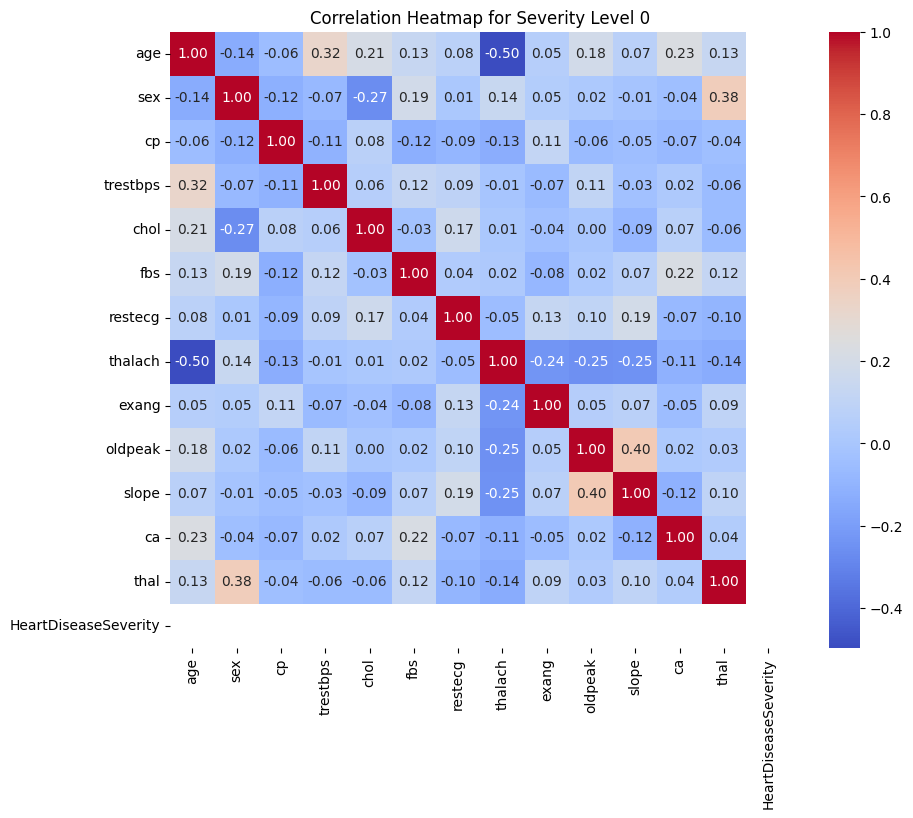

In [23]:
# Filter data for severity level 0
severity_0_data = train_data[train_data['HeartDiseaseSeverity'] == 0]

# Calculate and plot the correlation matrix for severity level 0
plt.figure(figsize=(10, 8))
sns.heatmap(severity_0_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Severity Level 0')
plt.show()

<table border="1" style="border-collapse: collapse; width: 90%; text-align: left; margin: 20px auto; font-size: 20px;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="padding: 16px;">Pair of Variables</th>
      <th style="padding: 16px;">Correlation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 16px;">slope and oldpeak</td>
      <td style="padding: 16px;">0.48</td>
    </tr>
    <tr>
      <td style="padding: 16px;">sex and thal</td>
      <td style="padding: 16px;">0.36</td>
    </tr>
    <tr>
      <td style="padding: 16px;">restecg and slope</td>
      <td style="padding: 16px;">0.28</td>
    </tr>
    <tr>
      <td style="padding: 16px;">tresbps and age</td>
      <td style="padding: 16px;">0.28</td>
    </tr>
    <tr>
      <td style="padding: 16px;">thalach and cp</td>
      <td style="padding: 16px;">-0.23</td>
    </tr>
    <tr>
      <td style="padding: 16px;">thalach and oldpeak</td>
      <td style="padding: 16px;">-0.29</td>
    </tr>
    <tr>
      <td style="padding: 16px;">thalach and slope</td>
      <td style="padding: 16px;">-0.33</td>
    </tr>
    <tr>
      <td style="padding: 16px;">thalach and age</td>
      <td style="padding: 16px;">-0.56</td>
    </tr>
  </tbody>
</table>




In [24]:
import plotly.express as px

# Filter data for rows with HeartDiseaseSeverity = 1
filtered_data = train_data[train_data['HeartDiseaseSeverity'] == 0].copy()

# Bin continuous variables to reduce clutter
filtered_data['thalach_binned'] = pd.cut(
    filtered_data['thalach'], bins=5, labels=['Low', 'Below Avg', 'Avg', 'Above Avg', 'High']
)
filtered_data['age_binned'] = pd.cut(
    filtered_data['age'], bins=4, labels=['Young', 'Middle-Aged', 'Older', 'Elderly']
)
filtered_data['oldpeak_binned'] = pd.cut(
    filtered_data['oldpeak'], bins=4, labels=['Minimal', 'Moderate', 'High', 'Severe']
)

# Create a cleaner parallel categories plot
fig = px.parallel_categories(
    filtered_data,
    dimensions=['age_binned', 'thalach_binned', 'slope', 'cp', 'oldpeak_binned'],  # Binned variables
    color='cp',  # Use 'cp' for coloring
    color_continuous_scale=px.colors.sequential.Inferno
)
fig.update_layout(
    title='Parallel Categories Plot for HeartDiseaseSeverity = 0',
    font=dict(size=14),
    title_x=0.5
)
fig.show()


<ipython-input-25-c57536b25575>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




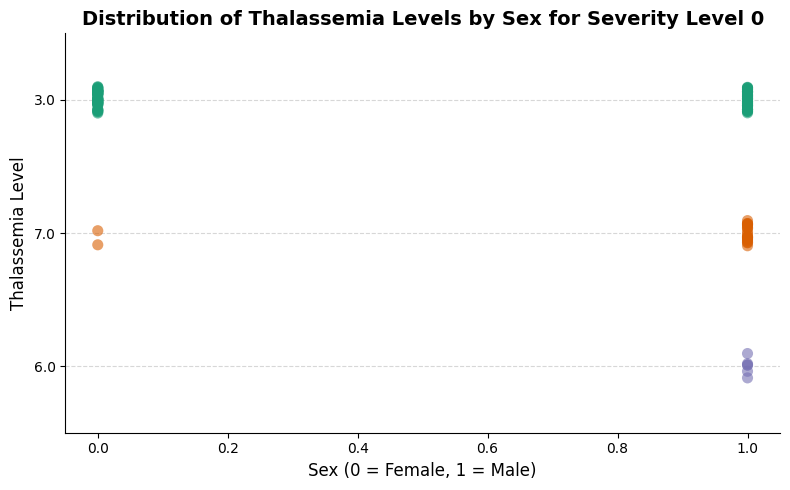

In [25]:
plt.figure(figsize=(8, 5))  # Increased figure size for better visibility

# Enhanced stripplot with larger marker size and better alpha
sns.stripplot(
    data=filtered_data,
    x='sex',
    y='thal',
    palette='Dark2',
    jitter=True,
    alpha=0.6,
    size=8  # Increased marker size for better visibility
)

# Add gridlines for improved readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add titles and labels
plt.title('Distribution of Thalassemia Levels by Sex for Severity Level 0', fontsize=14, fontweight='bold')
plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Thalassemia Level', fontsize=12)

# Refine axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove unnecessary spines
sns.despine(top=True, right=True)

plt.tight_layout()  # Adjust layout to



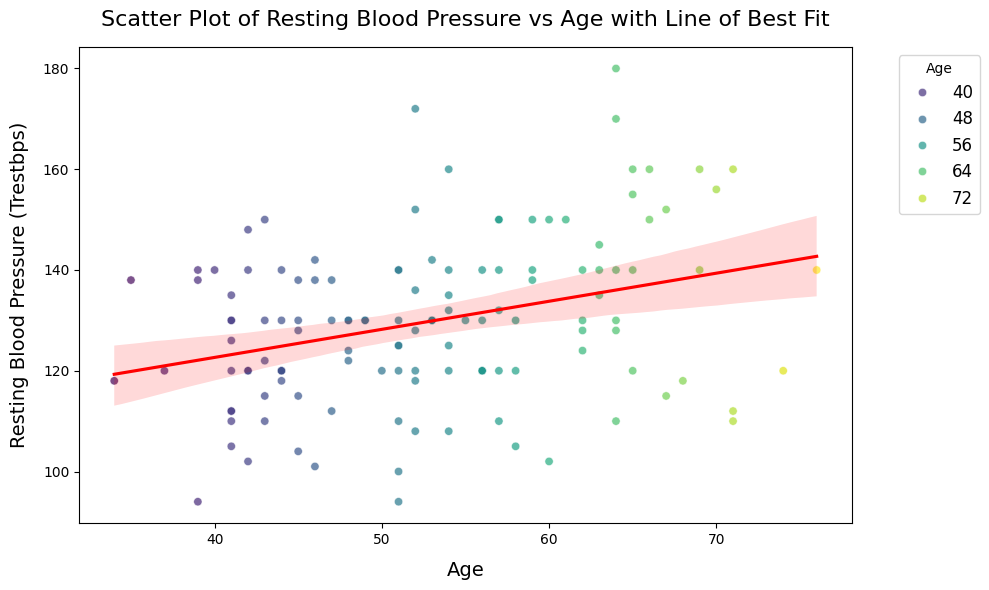

In [26]:
plt.figure(figsize=(10, 6))

# Scatter plot without using size for trestbps
sns.scatterplot(
    data=filtered_data,
    x='age',
    y='trestbps',
    hue='age',  # Use only hue to color by age
    palette='viridis',
    alpha=0.7
)

# Add a single regression line
sns.regplot(
    data=filtered_data,
    x='age',
    y='trestbps',
    scatter=False,  # Disable scatter points for regression line
    color='red',
    line_kws={'label': 'Best Fit Line'}
)

# Update plot labels and title
plt.title('Scatter Plot of Resting Blood Pressure vs Age with Line of Best Fit', fontsize=16, pad=15)
plt.xlabel('Age', fontsize=14, labelpad=10)
plt.ylabel('Resting Blood Pressure (Trestbps)', fontsize=14, labelpad=10)

# Customize the legend
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()


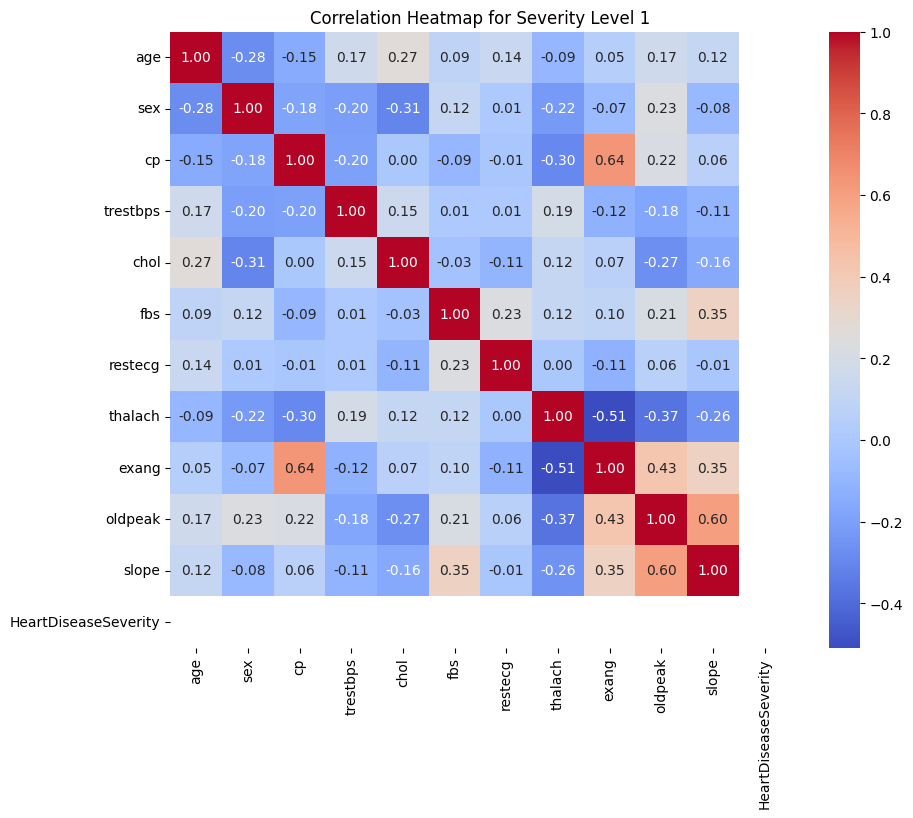

In [27]:
# Filter data for severity level 0
severity_1_data = train_data[train_data['HeartDiseaseSeverity'] == 1]

# Select only numeric columns for correlation analysis
numeric_data = severity_1_data.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix for severity level 0
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Severity Level 1')
plt.show()

<table border="1" style="border-collapse: collapse; width: 80%; text-align: left; margin: 20px auto; font-size: 18px;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="padding: 16px;">Pair of Variables</th>
      <th style="padding: 16px;">Correlation</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #e6ffe6;">
      <td style="padding: 16px;">oldpeak and slope</td>
      <td style="padding: 16px;">0.62</td>
    </tr>
    <tr style="background-color: #ffe6e6;">
      <td style="padding: 16px;">thalach and exang</td>
      <td style="padding: 16px;">-0.44</td>
    </tr>
    <tr style="background-color: #e6ffe6;">
      <td style="padding: 16px;">cp and exang</td>
      <td style="padding: 16px;">0.58</td>
    </tr>
    <tr style="background-color: #ffe6e6;">
      <td style="padding: 16px;">thalach and oldpeak</td>
      <td style="padding: 16px;">-0.41</td>
    </tr>
    <tr style="background-color: #e6ffe6;">
      <td style="padding: 16px;">exang and thal</td>
      <td style="padding: 16px;">0.47</td>
    </tr>
    <tr style="background-color: #ffe6e6;">
      <td style="padding: 16px;">chol and ca</td>
      <td style="padding: 16px;">-0.37</td>
    </tr>
    <tr style="background-color: #e6ffe6;">
      <td style="padding: 16px;">exang and oldpeak</td>
      <td style="padding: 16px;">0.42</td>
    </tr>
    <tr style="background-color: #ffe6e6;">
      <td style="padding: 16px;">thalach and thal</td>
      <td style="padding: 16px;">-0.31</td>
    </tr>
    <tr style="background-color: #e6ffe6;">
      <td style="padding: 16px;">cp and thal</td>
      <td style="padding: 16px;">0.38</td>
    </tr>
    <tr style="background-color: #ffe6e6;">
      <td style="padding: 16px;">chol and oldpeak</td>
      <td style="padding: 16px;">-0.26</td>
    </tr>
    <tr style="background-color: #e6ffe6;">
      <td style="padding: 16px;">fbs and slope</td>
      <td style="padding: 16px;">0.36</td>
    </tr>
    <tr style="background-color: #ffe6e6;">
      <td style="padding: 16px;">thalach and slope</td>
      <td style="padding: 16px;">-0.28</td>
    </tr>
    <tr style="background-color: #e6ffe6;">
      <td style="padding: 16px;">sex and chol</td>
      <td style="padding: 16px;">0.35</td>
    </tr>
    <tr style="background-color: #ffe6e6;">
      <td style="padding: 16px;">cp and trestbps</td>
      <td style="padding: 16px;">-0.21</td>
    </tr>
    <tr style="background-color: #e6ffe6;">
      <td style="padding: 16px;">sex and thal</td>
      <td style="padding: 16px;">0.33</td>
    </tr>
    <tr style="background-color: #ffe6e6;">
      <td style="padding: 16px;">thalach and ca</td>
      <td style="padding: 16px;">-0.22</td>
    </tr>
  </tbody>
</table>

In [28]:
# Filter the data to include only rows where HeartDiseaseSeverity is 1
filtered_data_2 = train_data[train_data['HeartDiseaseSeverity'] == 1].copy()

# Bin continuous variables to reduce clutter
filtered_data_2['thalach_binned'] = pd.cut(
    filtered_data_2['thalach'], bins=5, labels=['Low', 'Below Avg', 'Avg', 'Above Avg', 'High']
)
filtered_data_2['oldpeak_binned'] = pd.cut(
    filtered_data_2['oldpeak'], bins=4, labels=['Minimal', 'Moderate', 'High', 'Severe']
)

# Create a cleaner parallel categories plot
fig = px.parallel_categories(
    filtered_data_2,
    dimensions=['exang', 'thalach_binned', 'cp', 'thal', 'oldpeak_binned', 'slope'],  # Updated dimensions
    color='cp',  # Use 'cp' for coloring
    color_continuous_scale=px.colors.sequential.Inferno
)
fig.update_layout(
    title='Parallel Categories Plot for HeartDiseaseSeverity = 1',
    font=dict(size=14),
    title_x=0.5  # Center the title
)
fig.show()


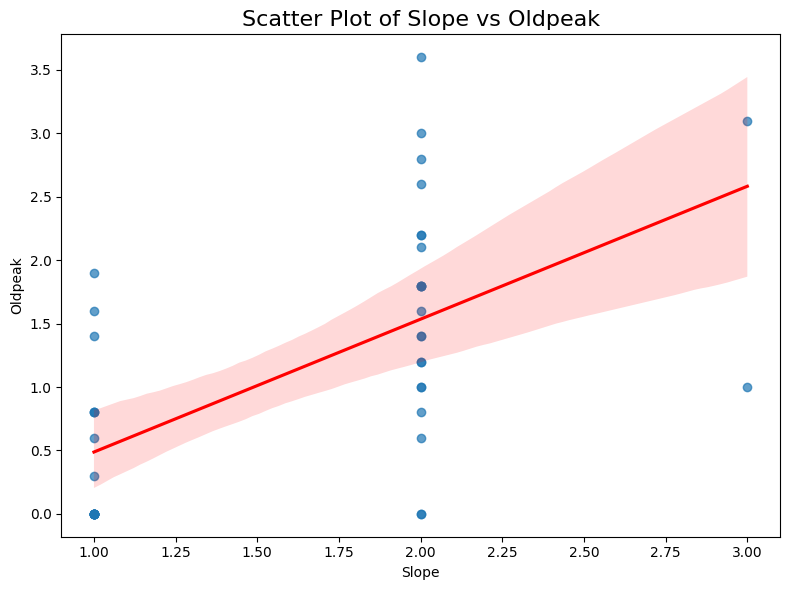

In [29]:
# Scatter plot with a trend line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=filtered_data_2,
    x='slope',
    y='oldpeak',
    scatter_kws={'alpha': 0.7},  # Add transparency to points
    line_kws={'color': 'red'},  # Color for trend line
)
plt.title('Scatter Plot of Slope vs Oldpeak', fontsize=16)
plt.xlabel('Slope')
plt.ylabel('Oldpeak')
plt.tight_layout()
plt.show()

<ipython-input-30-0896771179fb>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




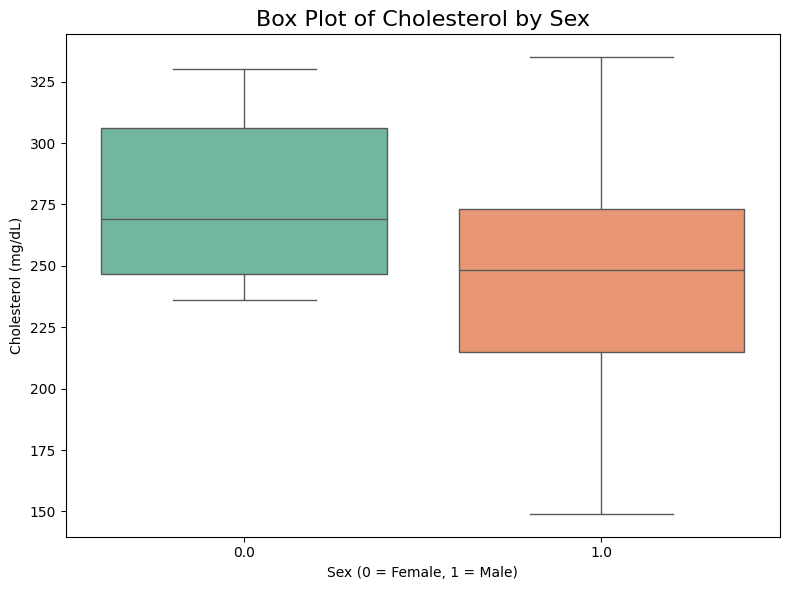

In [30]:
# Box plot for Sex and Chol
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=filtered_data_2,
    x='sex',
    y='chol',
    palette='Set2'
)
plt.title('Box Plot of Cholesterol by Sex', fontsize=16)
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Cholesterol (mg/dL)')
plt.tight_layout()
plt.show()

<ipython-input-31-fcadaa037263>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




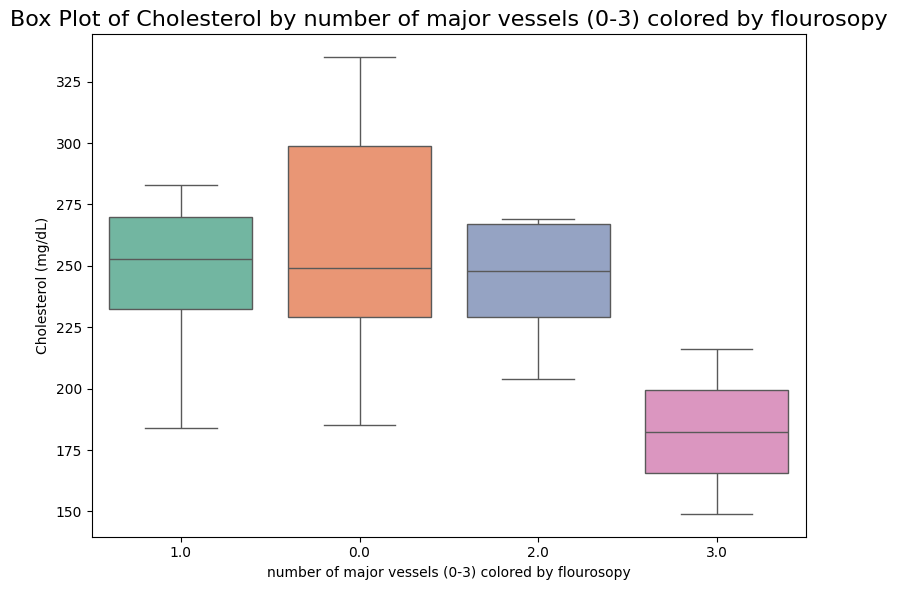

In [31]:
# Box plot for Sex and Chol
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=filtered_data_2,
    x='ca',
    y='chol',
    palette='Set2'
)
plt.title('Box Plot of Cholesterol by number of major vessels (0-3) colored by flourosopy', fontsize=16)
plt.xlabel('number of major vessels (0-3) colored by flourosopy')
plt.ylabel('Cholesterol (mg/dL)')
plt.tight_layout()
plt.show()

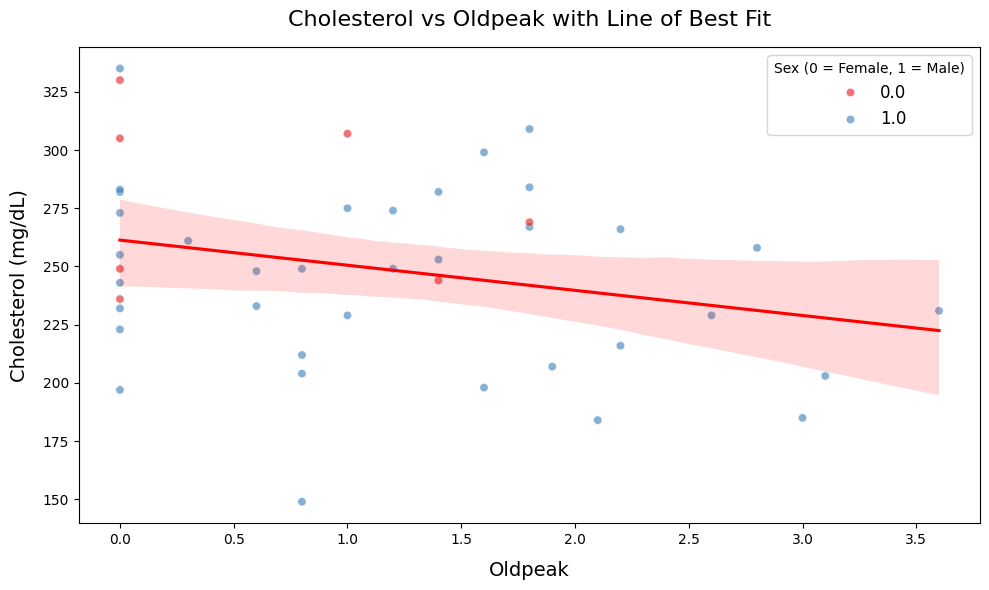

In [32]:
plt.figure(figsize=(10, 6))

# Scatter plot with hue based on sex
sns.scatterplot(
    data=filtered_data_2,
    x='oldpeak',
    y='chol',
    hue='sex',
    palette='Set1',
    alpha=0.6
)

# Add a single line of best fit
sns.regplot(
    data=filtered_data_2,
    x='oldpeak',
    y='chol',
    scatter=False,  # Disable scatter to overlay only the regression line
    color='red',
    line_kws={'label': 'Best Fit Line'}
)

# Update plot labels and title
plt.title('Cholesterol vs Oldpeak with Line of Best Fit', fontsize=16, pad=15)
plt.xlabel('Oldpeak', fontsize=14, labelpad=10)
plt.ylabel('Cholesterol (mg/dL)', fontsize=14, labelpad=10)

# Customize legend
plt.legend(
    title='Sex (0 = Female, 1 = Male)',
    loc='upper right',
    fontsize=12
)

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-33-0929c108f052>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




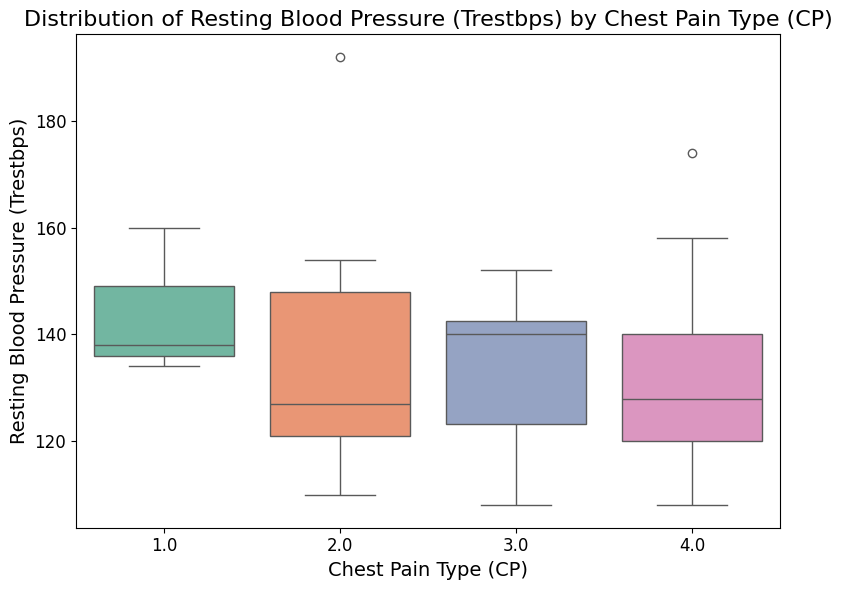

In [33]:
# Box plot for cp and trestbps
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=filtered_data_2,
    x='cp',
    y='trestbps',
    palette='Set2'
)

# Add titles and labels
plt.title('Distribution of Resting Blood Pressure (Trestbps) by Chest Pain Type (CP)', fontsize=16)
plt.xlabel('Chest Pain Type (CP)', fontsize=14)
plt.ylabel('Resting Blood Pressure (Trestbps)', fontsize=14)

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


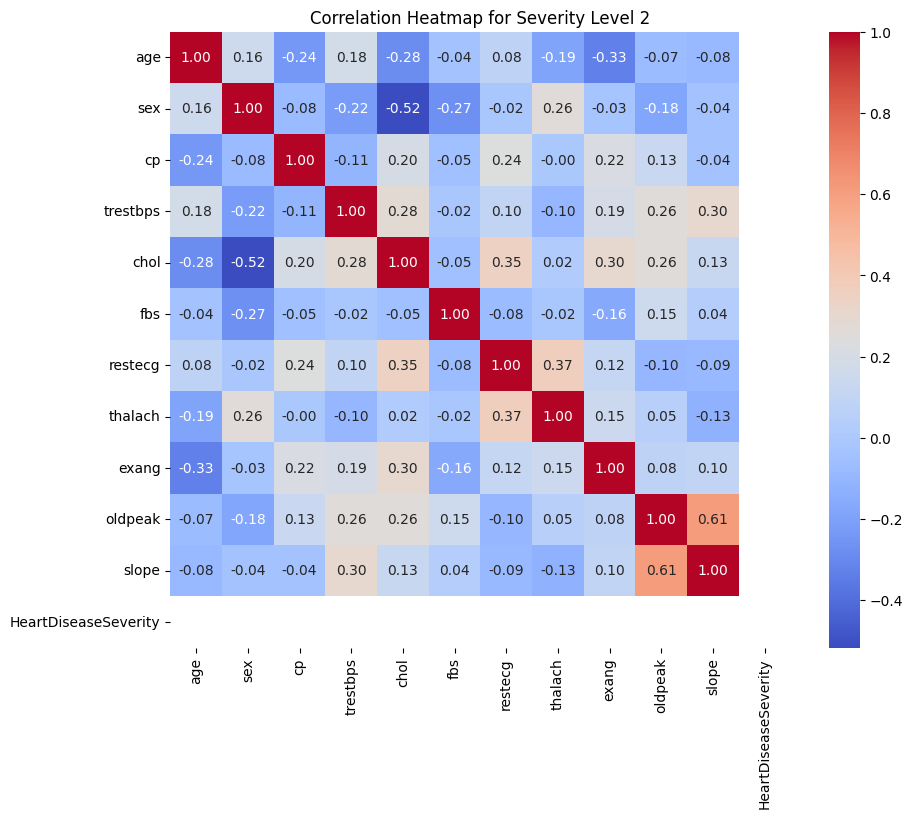

In [34]:
# Filter data for severity level 2
severity_2_data = train_data[train_data['HeartDiseaseSeverity'] == 2]

# Select only numeric columns for correlation analysis
numeric_data = severity_2_data.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix for severity level 2
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Severity Level 2')
plt.show()

<table border="1" style="border-collapse: collapse; width: 90%; text-align: left; margin: 20px auto; font-size: 18px;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="padding: 16px;">Pair of Variables</th>
      <th style="padding: 16px;">Correlation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 16px;">Oldpeak and slope</td>
      <td style="padding: 16px;">0.61</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Ca and age</td>
      <td style="padding: 16px;">0.49</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Thalach and thal</td>
      <td style="padding: 16px;">0.40</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Restecg and thalach</td>
      <td style="padding: 16px;">0.37</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Chol and restecg results</td>
      <td style="padding: 16px;">0.35</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Restecg and chol</td>
      <td style="padding: 16px;">0.35</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Trestbps and slope</td>
      <td style="padding: 16px;">0.30</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Chol and exang</td>
      <td style="padding: 16px;">0.30</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Exang and chol</td>
      <td style="padding: 16px;">0.30</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Slope and thal</td>
      <td style="padding: 16px;">0.30</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Trestbps and chol</td>
      <td style="padding: 16px;">0.28</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Chol and sex</td>
      <td style="padding: 16px;">-0.52</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Ca and cp</td>
      <td style="padding: 16px;">-0.34</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Exang and age</td>
      <td style="padding: 16px;">-0.33</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Age and exang</td>
      <td style="padding: 16px;">-0.33</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Age and chol</td>
      <td style="padding: 16px;">-0.28</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Chol and age</td>
      <td style="padding: 16px;">-0.28</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Fbs and sex</td>
      <td style="padding: 16px;">-0.27</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Age and cp</td>
      <td style="padding: 16px;">-0.24</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Trestbps and sex</td>
      <td style="padding: 16px;">-0.22</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Ca and oldpeak</td>
      <td style="padding: 16px;">-0.20</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Oldpeak and ca</td>
      <td style="padding: 16px;">-0.20</td>
    </tr>
  </tbody>
</table>


In [35]:
# Filter the data to include only rows where HeartDiseaseSeverity is 2
filtered_data_3 = train_data[train_data['HeartDiseaseSeverity'] == 2].copy()

# Bin continuous variables to reduce clutter
filtered_data_3['thalach_binned'] = pd.cut(
    filtered_data_3['thalach'], bins=5, labels=['Low', 'Below Avg', 'Avg', 'Above Avg', 'High']
)
filtered_data_3['oldpeak_binned'] = pd.cut(
    filtered_data_3['oldpeak'], bins=4, labels=['Minimal', 'Moderate', 'High', 'Severe']
)
filtered_data_3['age_binned'] = pd.cut(
    filtered_data_3['age'], bins=4, labels=['Young', 'Middle-Aged', 'Older', 'Elderly']  # Correct reference
)
filtered_data_3['chol_binned'] = pd.cut(
    filtered_data_3['chol'], bins=5, labels=['Low', 'Below Avg', 'Avg', 'Above Avg', 'High']
)

# Create a cleaner parallel categories plot
fig = px.parallel_categories(
    filtered_data_3,
    dimensions=['age_binned', 'exang', 'chol_binned'],  # Updated dimensions
    color='cp',  # Use 'cp' for coloring
    color_continuous_scale=px.colors.sequential.Inferno
)
fig.update_layout(
    title='Parallel Categories Plot for HeartDiseaseSeverity = 2',
    font=dict(size=14),
    title_x=0.5  # Center the title
)
fig.show()


In [36]:
# Filter the data to include only rows where HeartDiseaseSeverity is 2
filtered_data_3 = train_data[train_data['HeartDiseaseSeverity'] == 2].copy()

# Bin continuous variables to reduce clutter
filtered_data_3['thalach_binned'] = pd.cut(
    filtered_data_3['thalach'], bins=5, labels=['Low', 'Below Avg', 'Avg', 'Above Avg', 'High']
)
filtered_data_3['oldpeak_binned'] = pd.cut(
    filtered_data_3['oldpeak'], bins=4, labels=['Minimal', 'Moderate', 'High', 'Severe']
)
filtered_data_3['age_binned'] = pd.cut(
    filtered_data_3['age'], bins=4, labels=['Young', 'Middle-Aged', 'Older', 'Elderly']
)
filtered_data_3['chol_binned'] = pd.cut(
    filtered_data_3['chol'], bins=5, labels=['Low', 'Below Avg', 'Avg', 'Above Avg', 'High']
)
filtered_data_3['trestbps_binned'] = pd.cut(
    filtered_data_3['trestbps'], bins=5, labels=['Low', 'Below Avg', 'Avg', 'Above Avg', 'High']
)
# Create a cleaner parallel categories plot
fig = px.parallel_categories(
    filtered_data_3,
    dimensions=['trestbps_binned', 'slope', 'chol_binned'],  # Updated dimensions
    color='sex',  # Use 'sex' for coloring
    color_continuous_scale=px.colors.sequential.Inferno if filtered_data_3['sex'].dtype != 'object' else None
)
fig.update_layout(
    title='Parallel Categories Plot for HeartDiseaseSeverity = 2',
    font=dict(size=14),
    title_x=0.5  # Center the title
)
fig.show()


In [37]:
# Filter the data to include only rows where HeartDiseaseSeverity is 2
filtered_data_3 = train_data[train_data['HeartDiseaseSeverity'] == 2].copy()

# Bin continuous variables to reduce clutter
filtered_data_3['chol_binned'] = pd.cut(
    filtered_data_3['chol'], bins=5, labels=['Low', 'Below Avg', 'Avg', 'Above Avg', 'High']
)
filtered_data_3['age_binned'] = pd.cut(
    filtered_data_3['age'], bins=4, labels=['Young', 'Middle-Aged', 'Older', 'Elderly']
)
filtered_data_3['trestbps_binned'] = pd.cut(
    filtered_data_3['trestbps'], bins=5, labels=['Low', 'Below Avg', 'Avg', 'Above Avg', 'High']
)
# Create a cleaner parallel categories plot focusing on the specified variables
fig = px.parallel_categories(
    filtered_data_3,
    dimensions=['chol_binned', 'exang', 'restecg', 'sex', 'age_binned'],  # Focus on mentioned relationships
    color='chol',  # Use 'chol' for coloring
    color_continuous_scale=px.colors.sequential.Inferno  # Use a continuous color scale for chol
)
fig.update_layout(
    title='Parallel Categories Plot for HeartDiseaseSeverity = 2 (Focused on Chol Relationships)',
    font=dict(size=14),
    title_x=0.5  # Center the title
)
fig.show()


<ipython-input-38-dc8973f95fd6>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




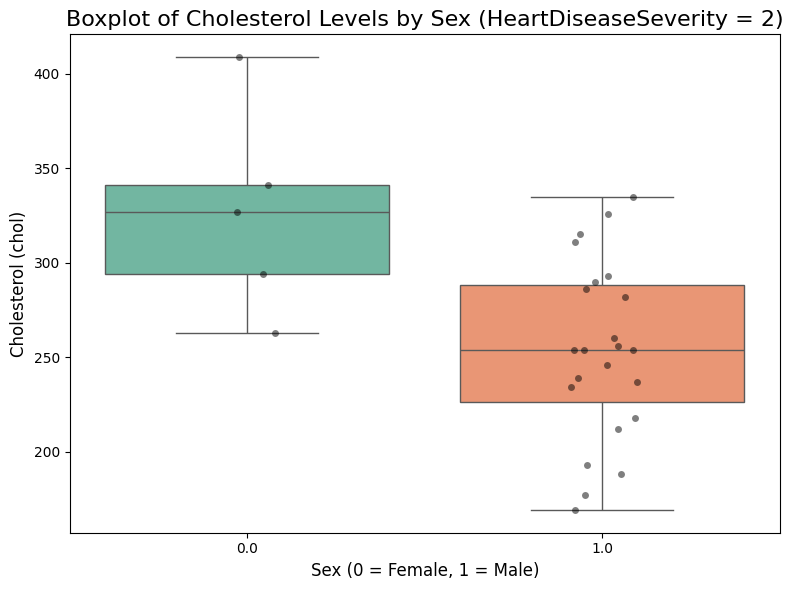

In [38]:
# Filter the data to include only rows where HeartDiseaseSeverity is 2
filtered_data_3 = train_data[train_data['HeartDiseaseSeverity'] == 2].copy()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a boxplot for chol by sex
sns.boxplot(
    data=filtered_data_3,
    x='sex',  # Categorical variable
    y='chol',  # Continuous variable
    palette='Set2'
)

# Add a strip plot for individual data points
sns.stripplot(
    data=filtered_data_3,
    x='sex',
    y='chol',
    color='black',
    alpha=0.5,  # Transparency for better visibility
    jitter=True  # Jitter for better separation of points
)

# Set plot title and axis labels
plt.title('Boxplot of Cholesterol Levels by Sex (HeartDiseaseSeverity = 2)', fontsize=16)
plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Cholesterol (chol)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


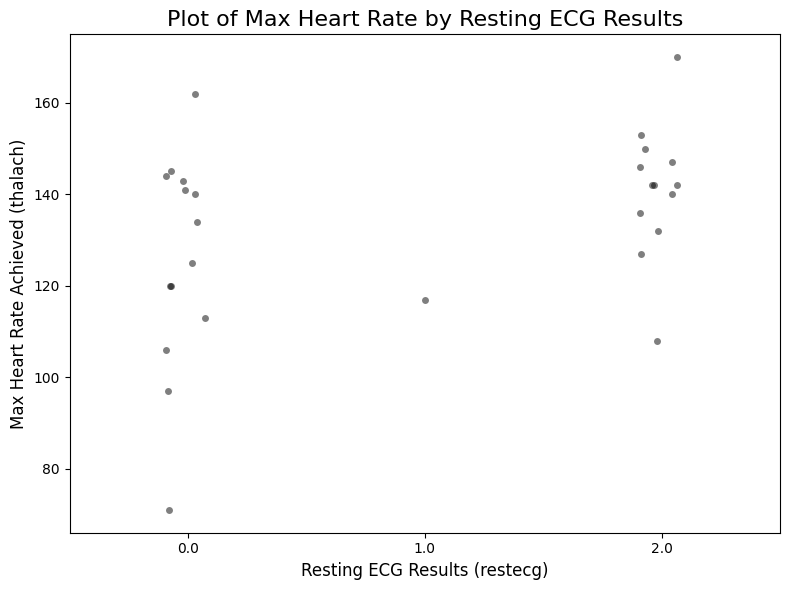

In [39]:
plt.figure(figsize=(8, 6))

# Boxplot for thalach by restecg
# sns.boxplot(
#     data=filtered_data_3,
#     x='restecg',
#     y='thalach',
#     palette='coolwarm',
#     showfliers=True  # Show outliers
# )

# Add individual data points with a strip plot
sns.stripplot(
    data=filtered_data_3,
    x='restecg',
    y='thalach',
    color='black',
    alpha=0.5,
    jitter=True  # Add jitter to separate overlapping points
)

# Set plot title and axis labels
plt.title('Plot of Max Heart Rate by Resting ECG Results', fontsize=16)
plt.xlabel('Resting ECG Results (restecg)', fontsize=12)
plt.ylabel('Max Heart Rate Achieved (thalach)', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()



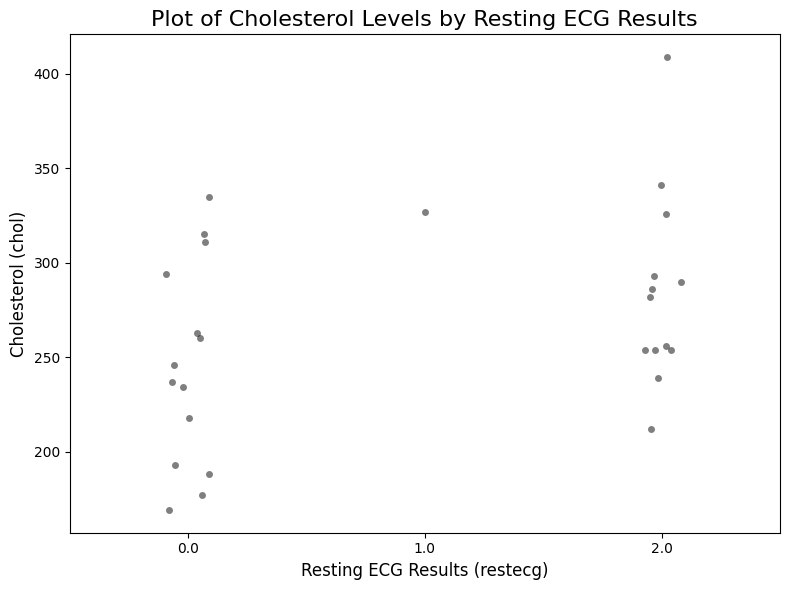

In [40]:
plt.figure(figsize=(8, 6))
#sns.boxplot(data=filtered_data_3, x='restecg', y='chol', palette='Set3')
sns.stripplot(data=filtered_data_3, x='restecg', y='chol', color='black', alpha=0.5, jitter=True)
plt.title('Plot of Cholesterol Levels by Resting ECG Results', fontsize=16)
plt.xlabel('Resting ECG Results (restecg)', fontsize=12)
plt.ylabel('Cholesterol (chol)', fontsize=12)
plt.tight_layout()
plt.show()

<Axes: xlabel='thalach', ylabel='thal'>

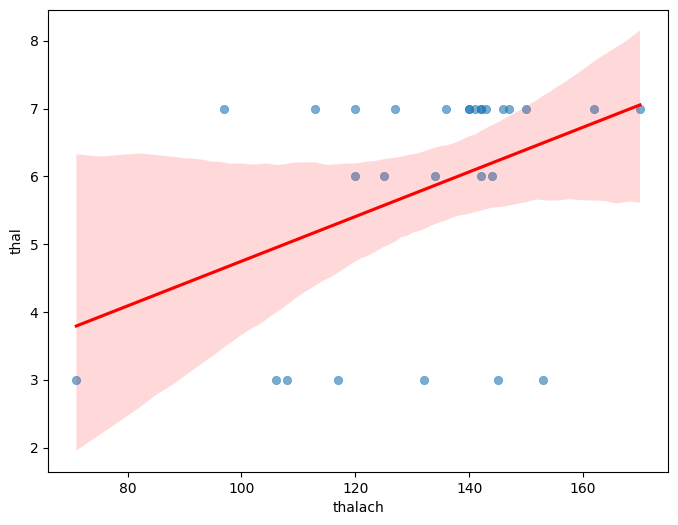

In [41]:
filtered_data_3['thalach'] = pd.to_numeric(filtered_data_3['thalach'], errors='coerce')
filtered_data_3['thal'] = pd.to_numeric(filtered_data_3['thal'], errors='coerce')

# Drop rows with NaN values in 'thalach' or 'thal' to avoid errors in regplot
filtered_data_3 = filtered_data_3.dropna(subset=['thalach', 'thal'])

# Now create the scatter plot and regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data_3, x='thalach', y='thal', alpha=0.6, edgecolor=None)
sns.regplot(data=filtered_data_3, x='thalach', y='thal', scatter=False, color='red', line_kws={'label': 'Regression Line'})


<ipython-input-42-3149f32975a4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




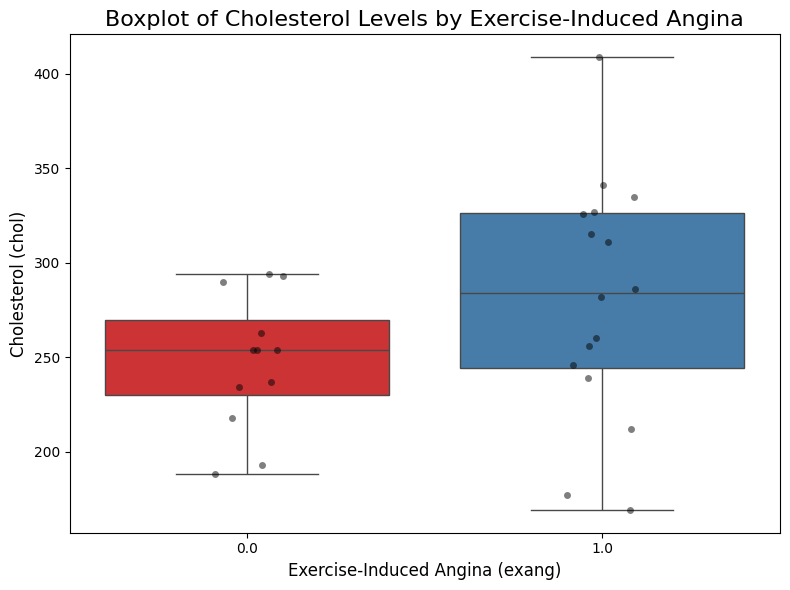

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data_3, x='exang', y='chol', palette='Set1')
sns.stripplot(data=filtered_data_3, x='exang', y='chol', color='black', alpha=0.5, jitter=True)
plt.title('Boxplot of Cholesterol Levels by Exercise-Induced Angina', fontsize=16)
plt.xlabel('Exercise-Induced Angina (exang)', fontsize=12)
plt.ylabel('Cholesterol (chol)', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-43-406832054c1f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




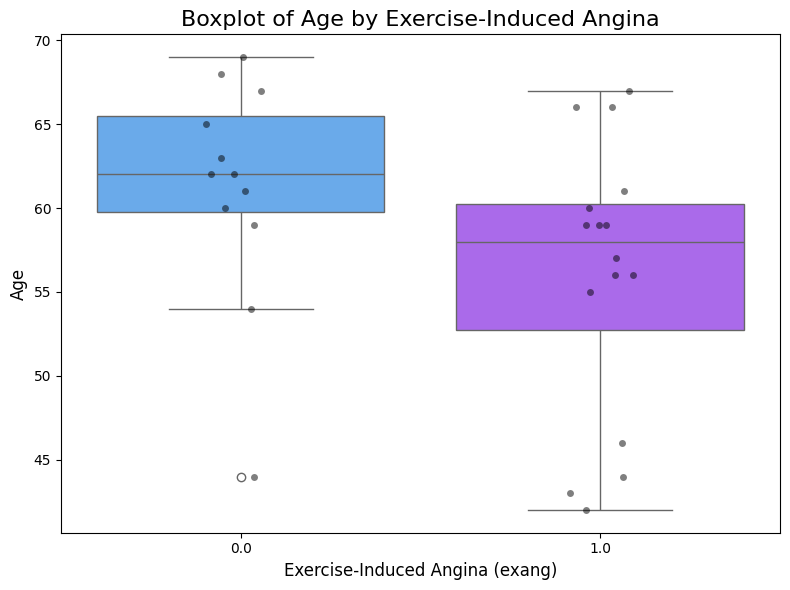

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data_3, x='exang', y='age', palette='cool')
sns.stripplot(data=filtered_data_3, x='exang', y='age', color='black', alpha=0.5, jitter=True)
plt.title('Boxplot of Age by Exercise-Induced Angina', fontsize=16)
plt.xlabel('Exercise-Induced Angina (exang)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

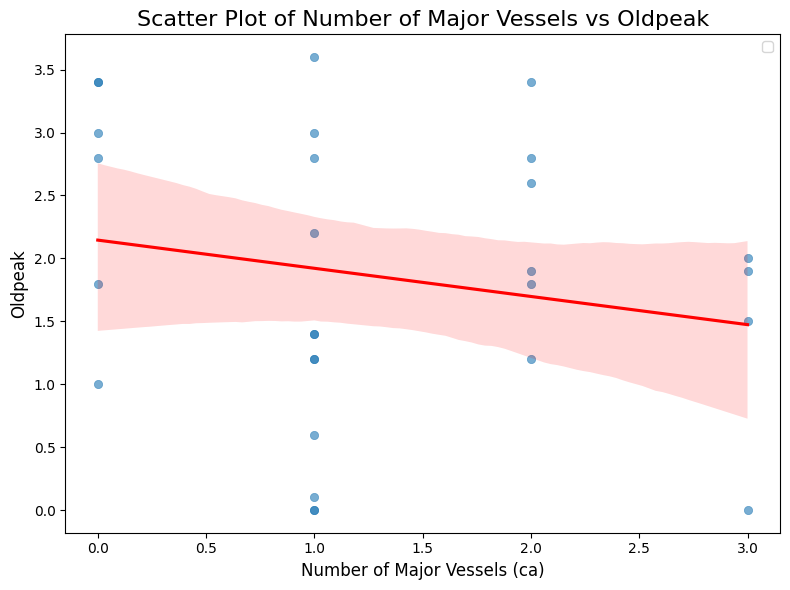

In [44]:
# Convert 'oldpeak' and 'ca' to numeric, coercing errors to NaN
filtered_data_3['oldpeak'] = pd.to_numeric(filtered_data_3['oldpeak'], errors='coerce')
filtered_data_3['ca'] = pd.to_numeric(filtered_data_3['ca'], errors='coerce')

# Drop rows with NaN values in 'oldpeak' or 'ca' to avoid errors in regplot
filtered_data_3 = filtered_data_3.dropna(subset=['oldpeak', 'ca'])

# Create scatter plot with swapped axes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data_3, x='ca', y='oldpeak', alpha=0.6, edgecolor=None)
sns.regplot(data=filtered_data_3, x='ca', y='oldpeak', scatter=False, color='red', line_kws={'label': 'Regression Line'})
plt.title('Scatter Plot of Number of Major Vessels vs Oldpeak', fontsize=16)
plt.xlabel('Number of Major Vessels (ca)', fontsize=12)
plt.ylabel('Oldpeak', fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

<ipython-input-45-c1ed52f1f30e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




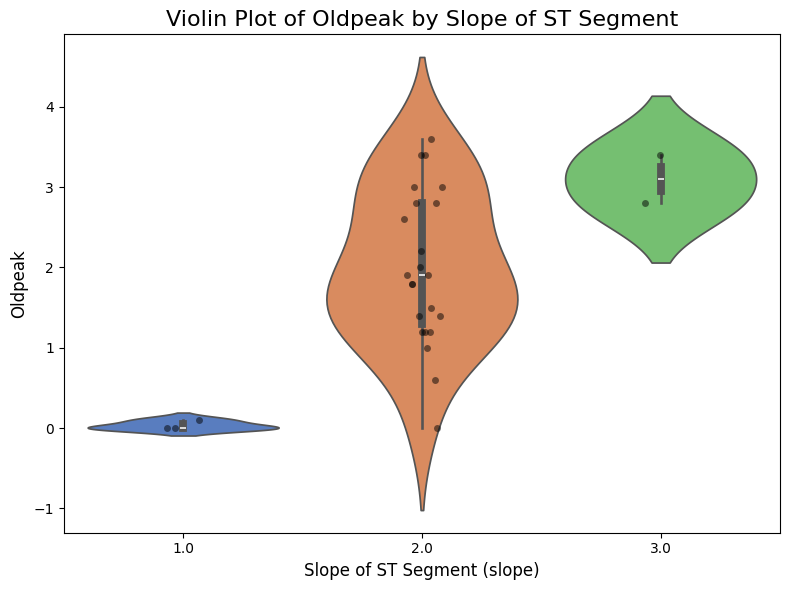

In [45]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=filtered_data_3, x='slope', y='oldpeak', palette='muted')
sns.stripplot(data=filtered_data_3, x='slope', y='oldpeak', color='black', alpha=0.5, jitter=True)
plt.title('Violin Plot of Oldpeak by Slope of ST Segment', fontsize=16)
plt.xlabel('Slope of ST Segment (slope)', fontsize=12)
plt.ylabel('Oldpeak', fontsize=12)
plt.tight_layout()
plt.show()


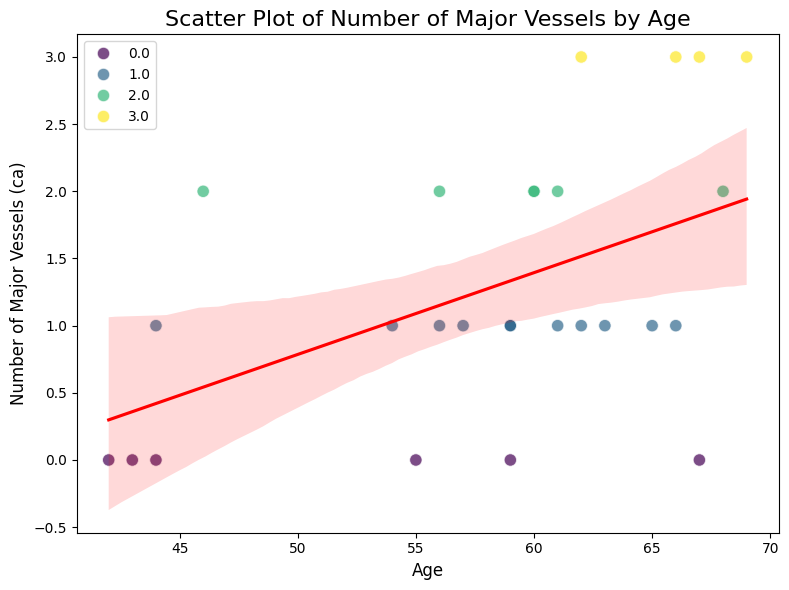

In [46]:
plt.figure(figsize=(8, 6))

# Scatter plot for ca vs age
sns.scatterplot(
    data=filtered_data_3,
    x='age',
    y='ca',
    hue='ca',  # Color by 'ca'
    palette='viridis',
    alpha=0.7,  # Transparency for better visibility
    s=80  # Adjust size of the points
)

# Add a regression line to show the trend
sns.regplot(
    data=filtered_data_3,
    x='age',
    y='ca',
    scatter=False,  # Disable scatter points in the regression plot
    color='red',
    line_kws={'label': 'Regression Line'}
)

# Set plot title and axis labels
plt.title('Scatter Plot of Number of Major Vessels by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Major Vessels (ca)', fontsize=12)

# Add legend
plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


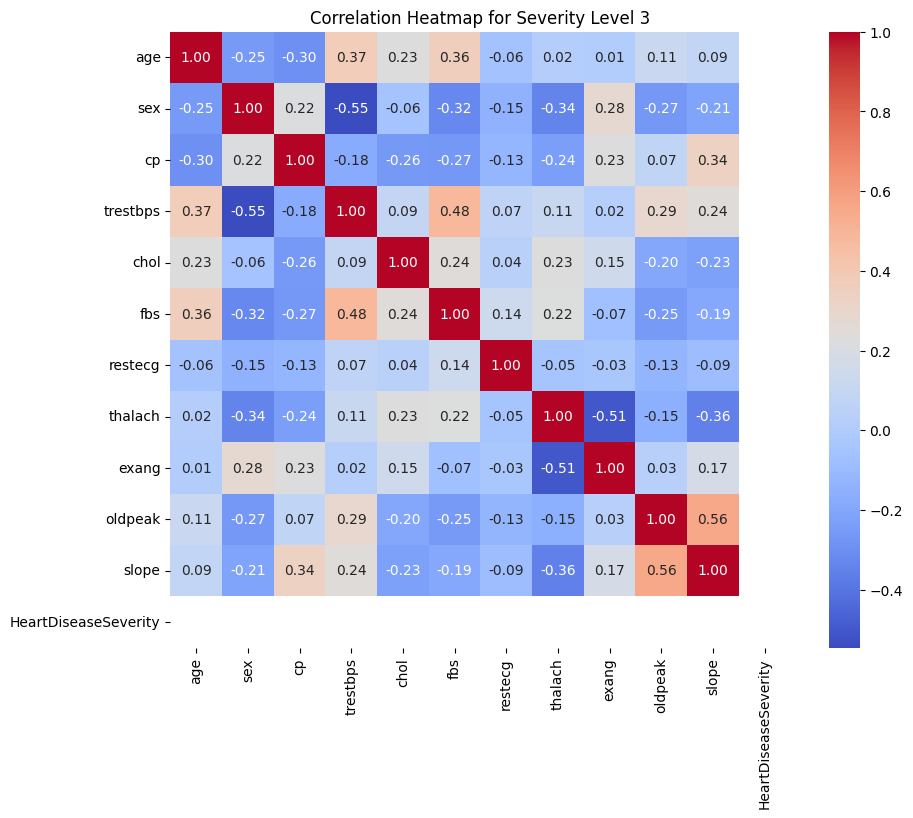

In [47]:
# Filter data for severity level 0
severity_3_data = train_data[train_data['HeartDiseaseSeverity'] == 3]

# Select only numeric columns for correlation analysis
numeric_data = severity_3_data.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix for severity level 0
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Severity Level 3')
plt.show()

<table border="1" class="dataframe table table-bordered table-striped">
  <thead>
    <tr style="text-align: center;">
      <th>Variable Pair</th>
      <th>Correlation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>oldpeak and slope</td>
      <td>0.56</td>
    </tr>
    <tr>
      <td>sex and trestbps</td>
      <td>-0.55</td>
    </tr>
    <tr>
      <td>exang and thalach</td>
      <td>-0.51</td>
    </tr>
    <tr>
      <td>thalach and exang</td>
      <td>-0.51</td>
    </tr>
    <tr>
      <td>trestbps and fbs</td>
      <td>0.48</td>
    </tr>
    <tr>
      <td>sex and ca</td>
      <td>-0.38</td>
    </tr>
    <tr>
      <td>age and trestbps</td>
      <td>0.37</td>
    </tr>
    <tr>
      <td>age and fbs</td>
      <td>0.36</td>
    </tr>
    <tr>
      <td>thalach and slope</td>
      <td>-0.36</td>
    </tr>
    <tr>
      <td>trestbps and thal</td>
      <td>0.35</td>
    </tr>
    <tr>
      <td>thalach and sex</td>
      <td>-0.34</td>
    </tr>
    <tr>
      <td>cp and slope</td>
      <td>0.34</td>
    </tr>
    <tr>
      <td>sex and thalach</td>
      <td>-0.34</td>
    </tr>
    <tr>
      <td>sex and fbs</td>
      <td>-0.32</td>
    </tr>
    <tr>
      <td>restecg and thal</td>
      <td>-0.32</td>
    </tr>
    <tr>
      <td>fbs and ca</td>
      <td>0.31</td>
    </tr>
    <tr>
      <td>chol and ca</td>
      <td>0.30</td>
    </tr>
    <tr>
      <td>age and cp</td>
      <td>-0.30</td>
    </tr>
    <tr>
      <td>thalach and thal</td>
      <td>0.30</td>
    </tr>
    <tr>
      <td>age and ca</td>
      <td>0.30</td>
    </tr>
    <tr>
      <td>trestbps and oldpeak</td>
      <td>0.29</td>
    </tr>
    <tr>
      <td>exang and sex</td>
      <td>0.28</td>
    </tr>
    <tr>
      <td>oldpeak and thal</td>
      <td>0.28</td>
    </tr>
    <tr>
      <td>sex and oldpeak</td>
      <td>-0.27</td>
    </tr>
    <tr>
      <td>cp and fbs</td>
      <td>-0.27</td>
    </tr>
    <tr>
      <td>cp and thal</td>
      <td>0.27</td>
    </tr>
    <tr>
      <td>cp and chol</td>
      <td>-0.26</td>
    </tr>
    <tr>
      <td>age and sex</td>
      <td>-0.25</td>
    </tr>
    <tr>
      <td>age and thal</td>
      <td>-0.25</td>
    </tr>
    <tr>
      <td>fbs and oldpeak</td>
      <td>-0.25</td>
    </tr>
    <tr>
      <td>sex and age</td>
      <td>-0.25</td>
    </tr>
    <tr>
      <td>thalach and cp</td>
      <td>-0.24</td>
    </tr>
    <tr>
      <td>cp and thalach</td>
      <td>-0.24</td>
    </tr>
    <tr>
      <td>chol and slope</td>
      <td>-0.23</td>
    </tr>
    <tr>
      <td>sex and slope</td>
      <td>-0.21</td>
    </tr>
    <tr>
      <td>exang and ca</td>
      <td>-0.20</td>
    </tr>
    <tr>
      <td>chol and oldpeak</td>
      <td>-0.20</td>
    </tr>
  </tbody>
</table>


In [48]:
# Filter the data to include only rows where HeartDiseaseSeverity is 2
filtered_data_4 = train_data[train_data['HeartDiseaseSeverity'] == 3].copy()

<ipython-input-49-285d7f7acfdf>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




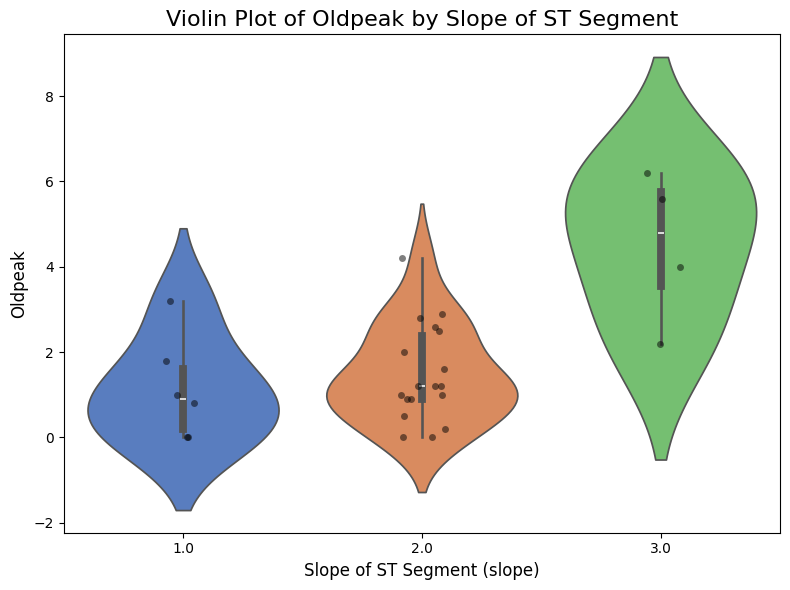

In [49]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=filtered_data_4, x='slope', y='oldpeak', palette='muted')
sns.stripplot(data=filtered_data_4, x='slope', y='oldpeak', color='black', alpha=0.5, jitter=True)
plt.title('Violin Plot of Oldpeak by Slope of ST Segment', fontsize=16)
plt.xlabel('Slope of ST Segment (slope)', fontsize=12)
plt.ylabel('Oldpeak', fontsize=12)
plt.tight_layout()
plt.show()

In [50]:
# Create a cleaner parallel categories plot
fig = px.parallel_categories(
    filtered_data_4,
    dimensions=['sex', 'trestbps', 'fbs'],  # Updated dimensions
    color='cp',  # Use 'cp' for coloring
    color_continuous_scale=px.colors.sequential.Inferno
)
fig.update_layout(
    title='Parallel Categories Plot for HeartDiseaseSeverity = 3',
    font=dict(size=14),
    title_x=0.5  # Center the title
)
fig.show()

<ipython-input-51-c7bb256d3156>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




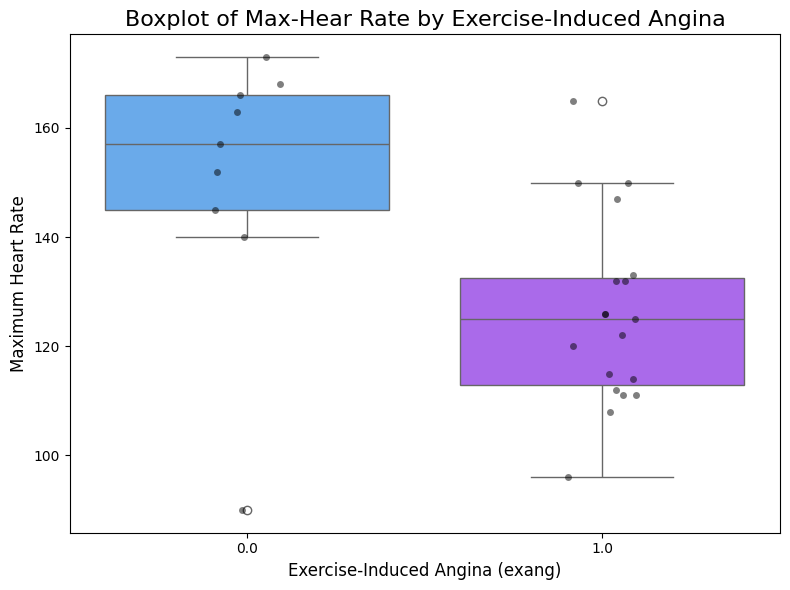

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data_4, x='exang', y='thalach', palette='cool')
sns.stripplot(data=filtered_data_4, x='exang', y='thalach', color='black', alpha=0.5, jitter=True)
plt.title('Boxplot of Max-Hear Rate by Exercise-Induced Angina', fontsize=16)
plt.xlabel('Exercise-Induced Angina (exang)', fontsize=12)
plt.ylabel('Maximum Heart Rate', fontsize=12)
plt.tight_layout()
plt.show()

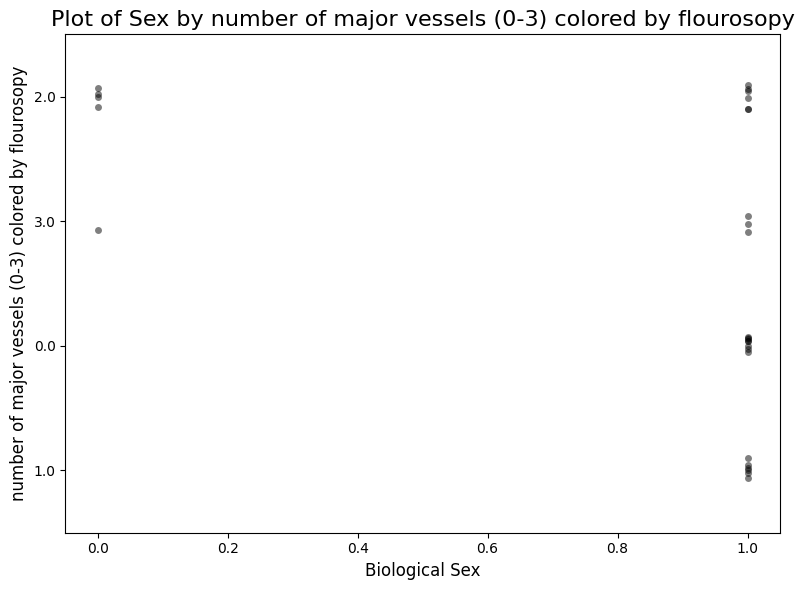

In [52]:
plt.figure(figsize=(8, 6))
#sns.boxplot(data=filtered_data_4, x='sex', y='ca', palette='cool')
sns.stripplot(data=filtered_data_4, x='sex', y='ca', color='black', alpha=0.5, jitter=True)
plt.title('Plot of Sex by number of major vessels (0-3) colored by flourosopy', fontsize=16)
plt.xlabel('Biological Sex', fontsize=12)
plt.ylabel('number of major vessels (0-3) colored by flourosopy', fontsize=12)
plt.tight_layout()
plt.show()

In [53]:
# Create a cleaner parallel categories plot
fig = px.parallel_categories(
    filtered_data_4,
    dimensions=['sex', 'thalach', 'slope'],  # Updated dimensions
    color='cp',  # Use 'cp' for coloring
    color_continuous_scale=px.colors.sequential.Inferno
)
fig.update_layout(
    title='Parallel Categories Plot for HeartDiseaseSeverity = 3',
    font=dict(size=14),
    title_x=0.5  # Center the title
)
fig.show()

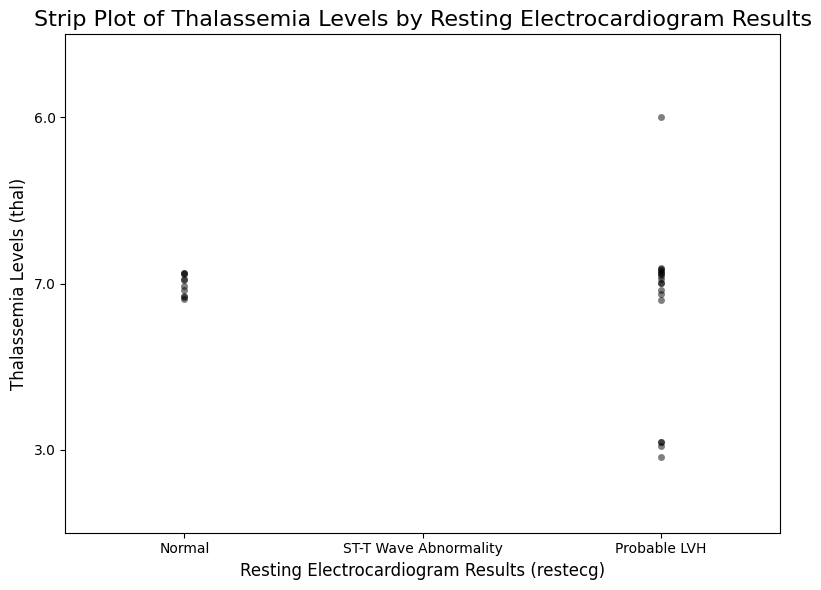

In [54]:
plt.figure(figsize=(8, 6))

# Strip plot for Resting ECG results (restecg) vs Thalassemia (thal)
sns.stripplot(
    data=filtered_data_4,
    x='restecg',
    y='thal',
    color='black',
    alpha=0.5,
    jitter=True
)

# Set plot title and axis labels
plt.title('Strip Plot of Thalassemia Levels by Resting Electrocardiogram Results', fontsize=16)
plt.xlabel('Resting Electrocardiogram Results (restecg)', fontsize=12)
plt.ylabel('Thalassemia Levels (thal)', fontsize=12)

# Adjust x-axis limits and ticks
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'ST-T Wave Abnormality', 'Probable LVH'])
plt.xlim(-0.5, 2.5)

# Adjust layout
plt.tight_layout()
plt.show()



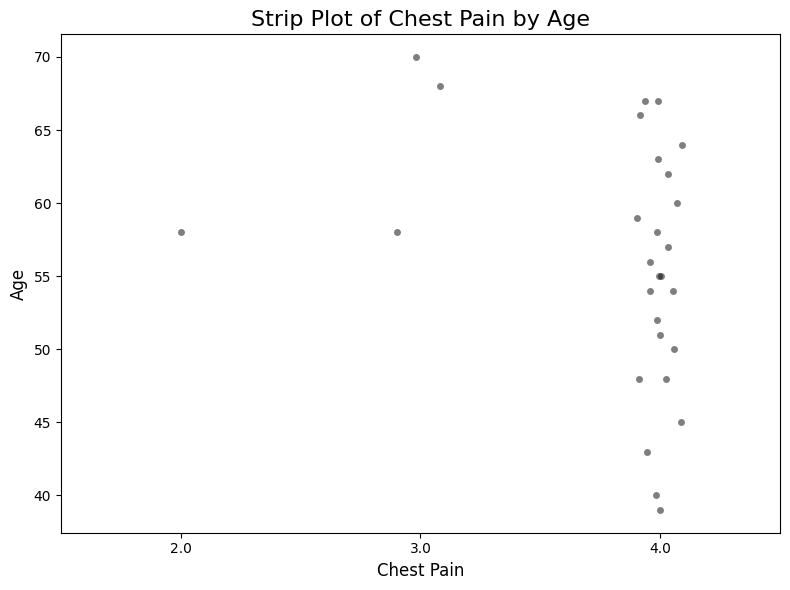

In [55]:
plt.figure(figsize=(8, 6))


sns.stripplot(
    data=filtered_data_4,
    x='cp',
    y='age',
    color='black',
    alpha=0.5,
    jitter=True
)

# Set plot title and axis labels
plt.title('Strip Plot of Chest Pain by Age', fontsize=16)
plt.xlabel('Chest Pain', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


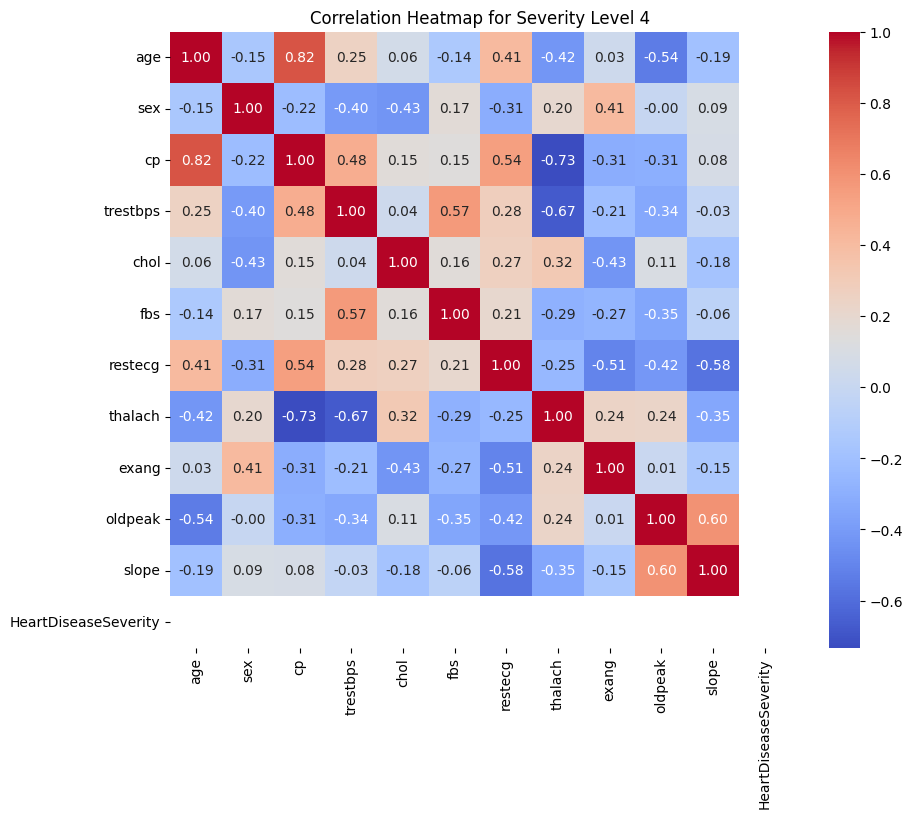

In [56]:
# Filter data for severity level 0
severity_4_data = train_data[train_data['HeartDiseaseSeverity'] == 4]

# Select only numeric columns for correlation analysis
numeric_data = severity_4_data.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix for severity level 0
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Severity Level 4')
plt.show()

<table border="1" style="border-collapse: collapse; width: 90%; text-align: left; margin: 20px auto; font-size: 18px;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="padding: 16px;">Pair of Variables</th>
      <th style="padding: 16px;">Correlation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 16px;">Age and cp</td>
      <td style="padding: 16px;">0.82</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Cp and age</td>
      <td style="padding: 16px;">0.82</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Cp and thalach</td>
      <td style="padding: 16px;">-0.73</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Chol and ca</td>
      <td style="padding: 16px;">0.69</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Restecg and ca</td>
      <td style="padding: 16px;">0.66</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Cp and ca</td>
      <td style="padding: 16px;">0.59</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Fbs and trestbps</td>
      <td style="padding: 16px;">0.57</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Cp and restecg</td>
      <td style="padding: 16px;">0.54</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Oldpeak and slope</td>
      <td style="padding: 16px;">0.60</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Restecg and slope</td>
      <td style="padding: 16px;">-0.58</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Exang and ca</td>
      <td style="padding: 16px;">-0.60</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Age and oldpeak</td>
      <td style="padding: 16px;">-0.54</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Exang and thal</td>
      <td style="padding: 16px;">-0.53</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Chol and exang</td>
      <td style="padding: 16px;">-0.43</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Sex and chol</td>
      <td style="padding: 16px;">-0.43</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Age and thalach</td>
      <td style="padding: 16px;">-0.42</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Age and thal</td>
      <td style="padding: 16px;">-0.42</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Restecg and exang</td>
      <td style="padding: 16px;">-0.51</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Sex and ca</td>
      <td style="padding: 16px;">-0.45</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Sex and trestbps</td>
      <td style="padding: 16px;">-0.40</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Age and ca</td>
      <td style="padding: 16px;">0.39</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Slope and thal</td>
      <td style="padding: 16px;">0.48</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Cp and trestbps</td>
      <td style="padding: 16px;">0.48</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Restecg and thal</td>
      <td style="padding: 16px;">-0.32</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Cp and thal</td>
      <td style="padding: 16px;">-0.28</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Chol and thalach</td>
      <td style="padding: 16px;">0.32</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Thalach and slope</td>
      <td style="padding: 16px;">-0.35</td>
    </tr>
    <tr>
      <td style="padding: 16px;">Trestbps and thalach</td>
      <td style="padding: 16px;">-0.67</td>
    </tr>
  </tbody>
</table>


In [57]:
# Filter the data to include only rows where HeartDiseaseSeverity is 2
filtered_data_5 = train_data[train_data['HeartDiseaseSeverity'] == 4].copy()

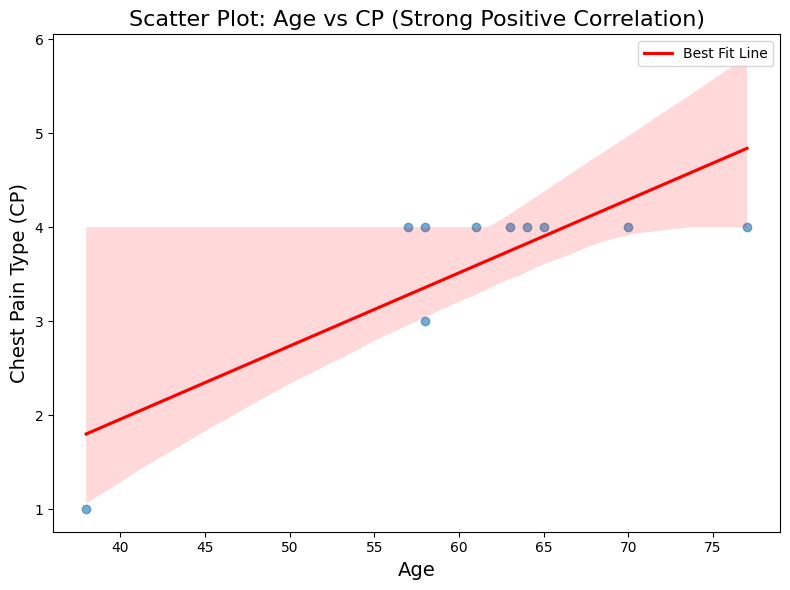

In [58]:


# Scatter plot for Age and CP (strong positive correlation)
plt.figure(figsize=(8, 6))
sns.regplot(
    data=filtered_data_5,
    x='age',
    y='cp',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red', 'label': 'Best Fit Line'}
)
plt.title('Scatter Plot: Age vs CP (Strong Positive Correlation)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Chest Pain Type (CP)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


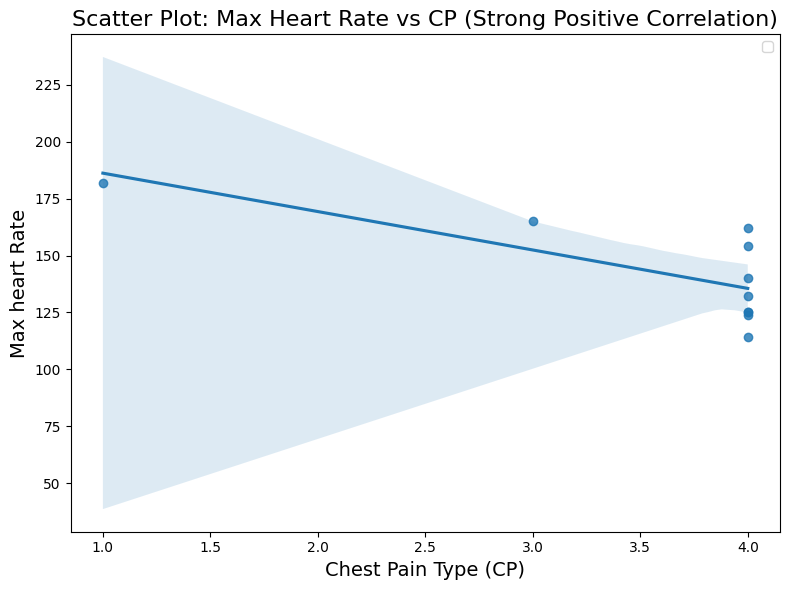

In [59]:
# Scatter plot for Age and CP (strong positive correlation)
plt.figure(figsize=(8, 6))
sns.regplot(
    data=filtered_data_5,
    x='cp',
    y='thalach',
    #scatter_kws={'alpha': 0.6},
    #line_kws={'color': 'red', 'label': 'Best Fit Line'}
)
plt.title('Scatter Plot: Max Heart Rate vs CP (Strong Positive Correlation)', fontsize=16)
plt.xlabel('Chest Pain Type (CP)', fontsize=14)
plt.ylabel('Max heart Rate', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

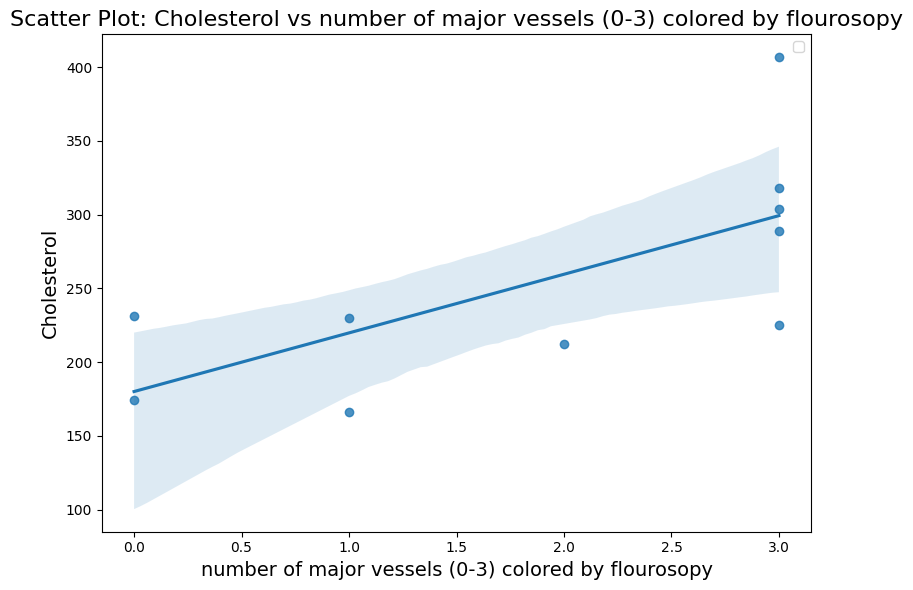

In [60]:
# Convert 'ca' column to numeric, handling errors
filtered_data_5['ca'] = pd.to_numeric(filtered_data_5['ca'], errors='coerce')

# Scatter plot for Cholesterol vs number of major vessels (0-3) colored by flourosopy
plt.figure(figsize=(8, 6))
sns.regplot(
    data=filtered_data_5,
    x='ca',
    y='chol',
    #scatter_kws={'alpha': 0.6},
    #line_kws={'color': 'red', 'label': 'Best Fit Line'}
)
plt.title('Scatter Plot: Cholesterol vs number of major vessels (0-3) colored by flourosopy', fontsize=16)
plt.xlabel('number of major vessels (0-3) colored by flourosopy', fontsize=14)
plt.ylabel('Cholesterol', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

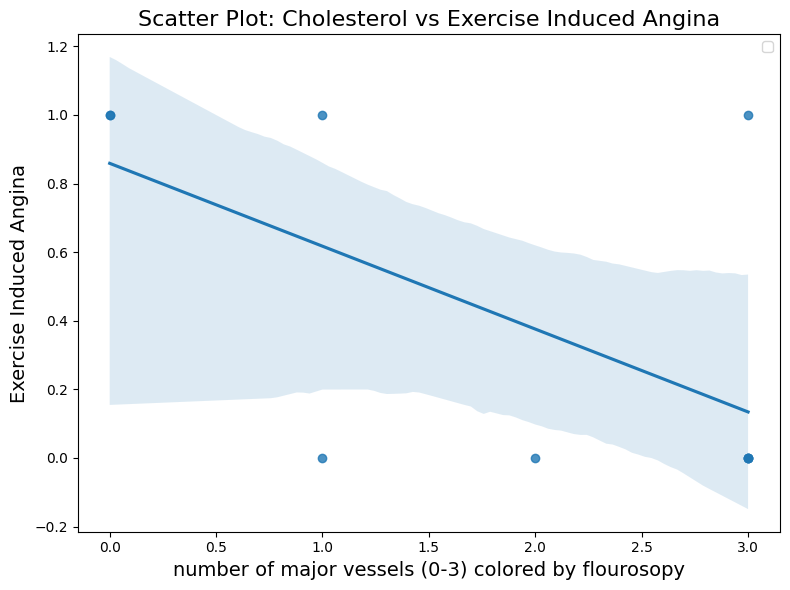

In [61]:
# Scatter plot for Age and CP (strong positive correlation)
plt.figure(figsize=(8, 6))
sns.regplot(
    data=filtered_data_5,
    x='ca',
    y='exang',
    #scatter_kws={'alpha': 0.6},
    #line_kws={'color': 'red', 'label': 'Best Fit Line'}
)
plt.title('Scatter Plot: Cholesterol vs Exercise Induced Angina', fontsize=16)
plt.xlabel('number of major vessels (0-3) colored by flourosopy', fontsize=14)
plt.ylabel('Exercise Induced Angina', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

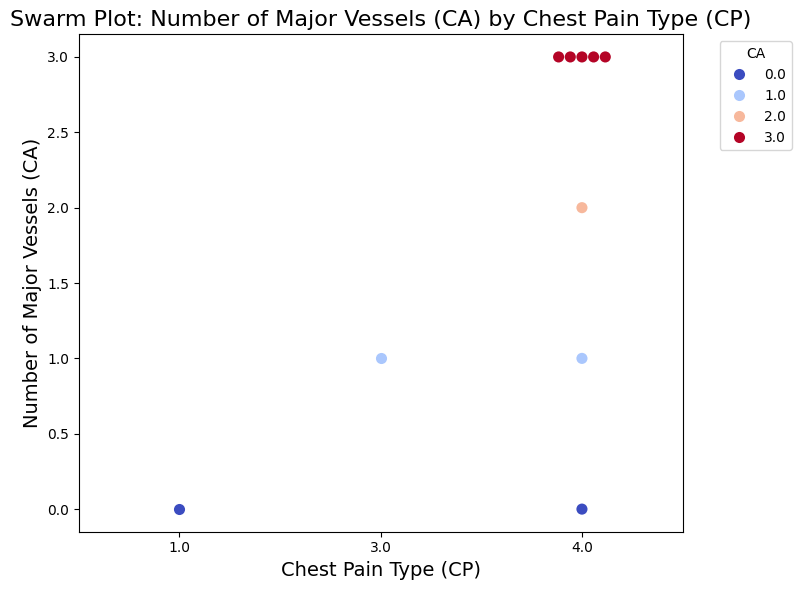

In [62]:
plt.figure(figsize=(8, 6))
sns.swarmplot(
    data=filtered_data_5,
    x='cp',
    y='ca',
    hue='ca',  # Optional: color by 'ca'
    palette='coolwarm',
    size=8  # Adjust marker size
)
plt.title('Swarm Plot: Number of Major Vessels (CA) by Chest Pain Type (CP)', fontsize=16)
plt.xlabel('Chest Pain Type (CP)', fontsize=14)
plt.ylabel('Number of Major Vessels (CA)', fontsize=14)
plt.legend(title='CA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-64-67156e95207c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




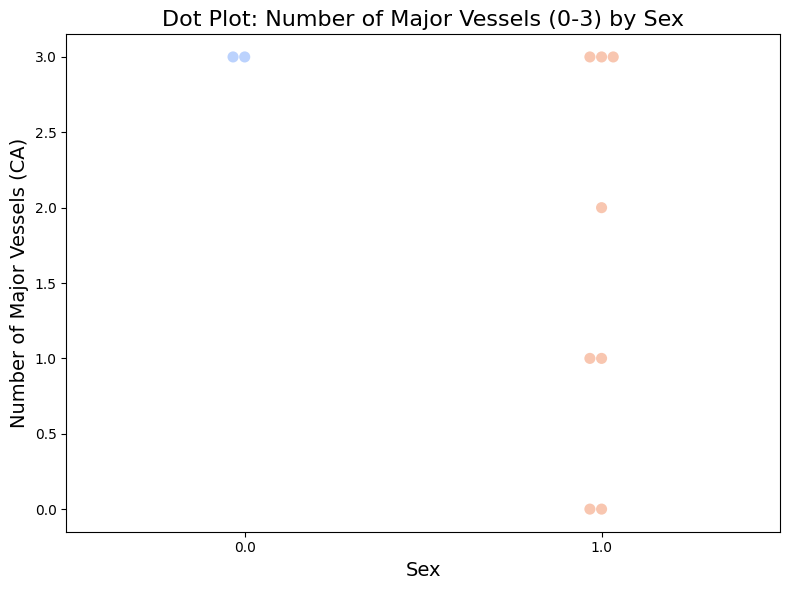

In [64]:
plt.figure(figsize=(8, 6))

# Swarm plot for Sex and CA
sns.swarmplot(
    data=filtered_data_5,
    x='sex',
    y='ca',
    palette='coolwarm',
    size=8,  # Adjust marker size
    alpha=0.8  # Add transparency for better visibility
)

# Add titles and labels
plt.title('Dot Plot: Number of Major Vessels (0-3) by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Number of Major Vessels (CA)', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-65-c479e8b8621d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




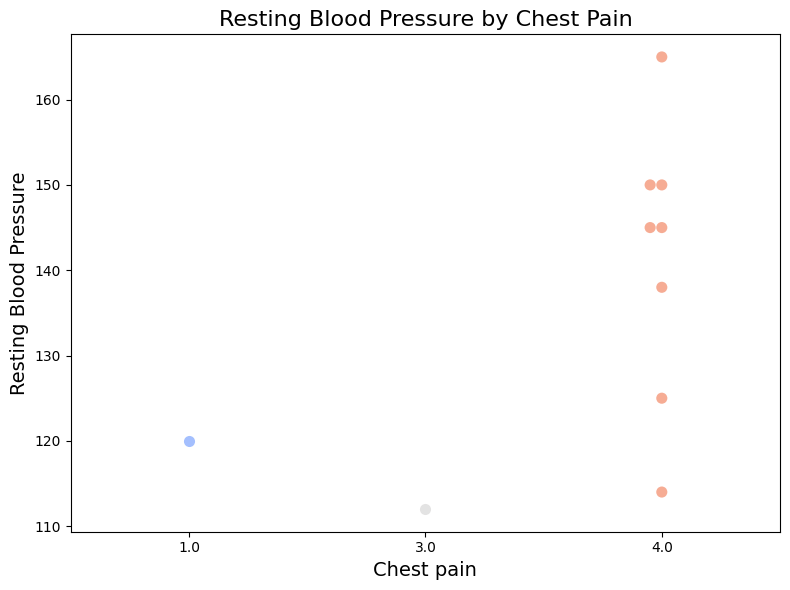

In [65]:
plt.figure(figsize=(8, 6))

# Swarm plot for Sex and CA
sns.swarmplot(
    data=filtered_data_5,
    x='cp',
    y='trestbps',
    palette='coolwarm',
    size=8,  # Adjust marker size
    alpha=0.8  # Add transparency for better visibility
)

# Add titles and labels
plt.title('Resting Blood Pressure by Chest Pain', fontsize=16)
plt.xlabel('Chest pain', fontsize=14)
plt.ylabel('Resting Blood Pressure', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-66-65f9775377aa>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




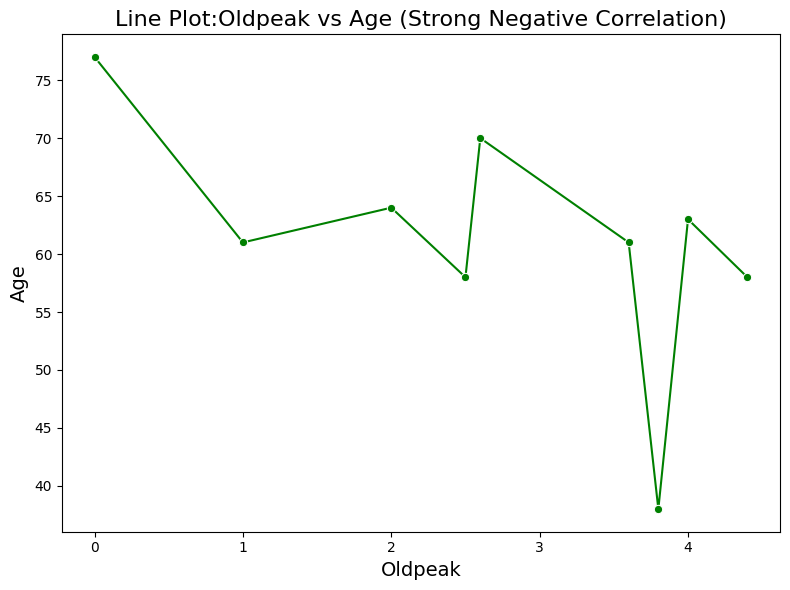

In [66]:
# Line plot for Age and Oldpeak (strong negative correlation)
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=filtered_data_5,
    x='oldpeak',
    y='age',
    marker='o',
    ci=None,
    color='green'
)
plt.title('Line Plot:Oldpeak vs Age (Strong Negative Correlation)', fontsize=16)
plt.xlabel('Oldpeak', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-67-260f2fd18a2d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




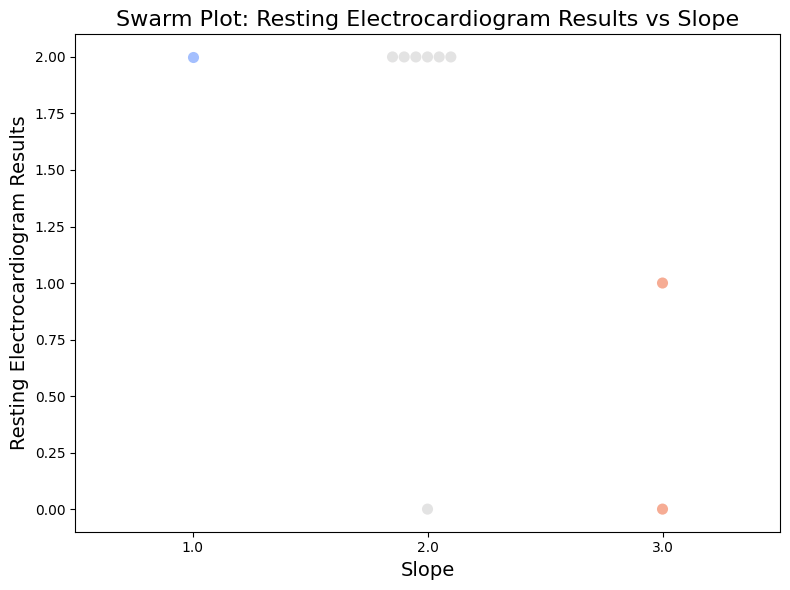

In [67]:
plt.figure(figsize=(8, 6))

# Swarm plot for Slope and Restecg
sns.swarmplot(
    data=filtered_data_5,
    x='slope',
    y='restecg',
    palette='coolwarm',
    size=8,  # Adjust marker size
    alpha=0.8  # Add transparency for better visibility
)

# Add titles and labels
plt.title('Swarm Plot: Resting Electrocardiogram Results vs Slope', fontsize=16)
plt.xlabel('Slope', fontsize=14)
plt.ylabel('Resting Electrocardiogram Results', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()



<ipython-input-68-6be4bbc4fe71>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




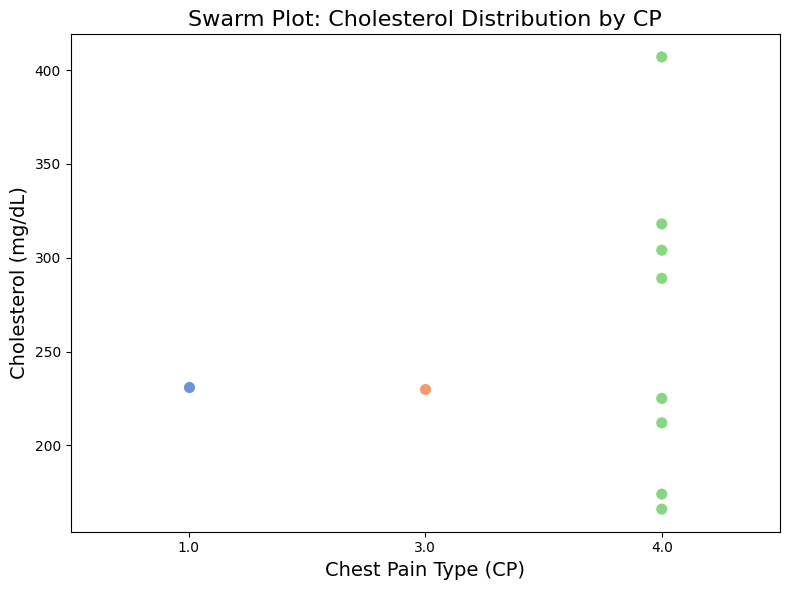

In [68]:
plt.figure(figsize=(8, 6))

# Swarm plot for CP and Chol
sns.swarmplot(
    data=filtered_data_5,
    x='cp',
    y='chol',
    palette='muted',
    size=8,  # Adjust marker size
    alpha=0.8  # Add transparency for better visibility
)

# Add titles and labels
plt.title('Swarm Plot: Cholesterol Distribution by CP', fontsize=16)
plt.xlabel('Chest Pain Type (CP)', fontsize=14)
plt.ylabel('Cholesterol (mg/dL)', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-69-da98baf51277>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




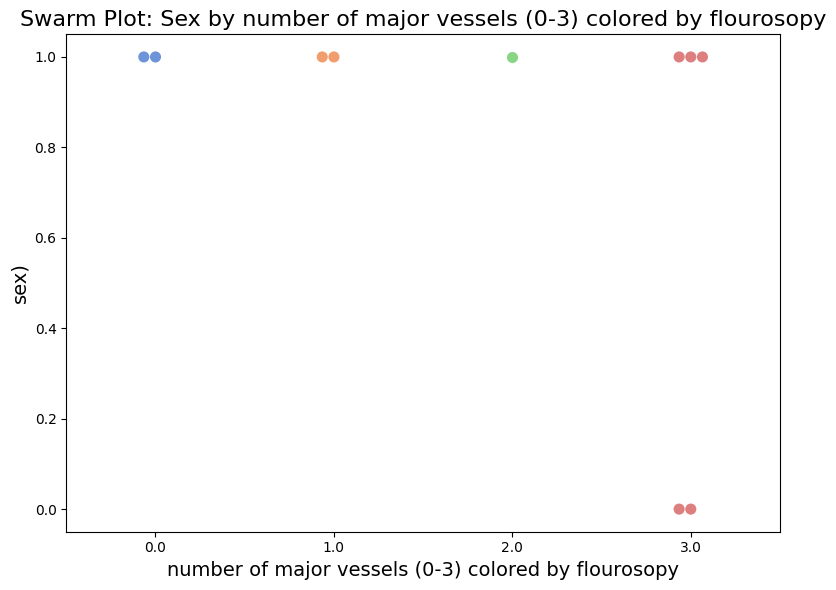

In [69]:
plt.figure(figsize=(8, 6))

# Swarm plot for CP and Chol
sns.swarmplot(
    data=filtered_data_5,
    x='ca',
    y='sex',
    palette='muted',
    size=8,  # Adjust marker size
    alpha=0.8  # Add transparency for better visibility
)

# Add titles and labels
plt.title('Swarm Plot: Sex by number of major vessels (0-3) colored by flourosopy', fontsize=16)
plt.xlabel('number of major vessels (0-3) colored by flourosopy', fontsize=14)
plt.ylabel('sex)', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-70-722a2d7646e2>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




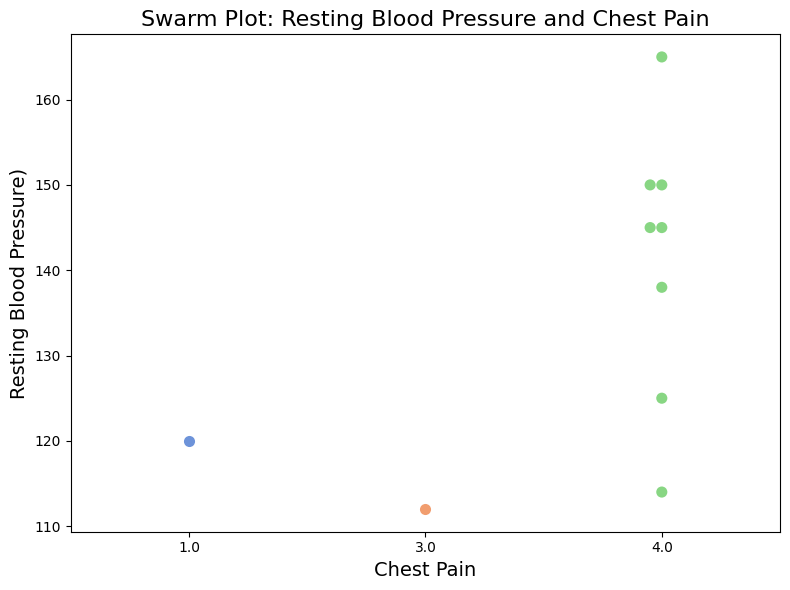

In [70]:
plt.figure(figsize=(8, 6))

# Swarm plot for CP and Chol
sns.swarmplot(
    data=filtered_data_5,
    x='cp',
    y='trestbps',
    palette='muted',
    size=8,  # Adjust marker size
    alpha=0.8  # Add transparency for better visibility
)

# Add titles and labels
plt.title('Swarm Plot: Resting Blood Pressure and Chest Pain', fontsize=16)
plt.xlabel('Chest Pain', fontsize=14)
plt.ylabel('Resting Blood Pressure)', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

In [71]:
import plotly.express as px

# Parallel coordinates plot for key variables
fig = px.parallel_coordinates(
    filtered_data_5,
    dimensions=['cp', 'thalach', 'oldpeak', 'ca'],
    color='ca',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_layout(title='Parallel Coordinates Plot for CP, Thalach, Oldpeak, and CA')
fig.show()


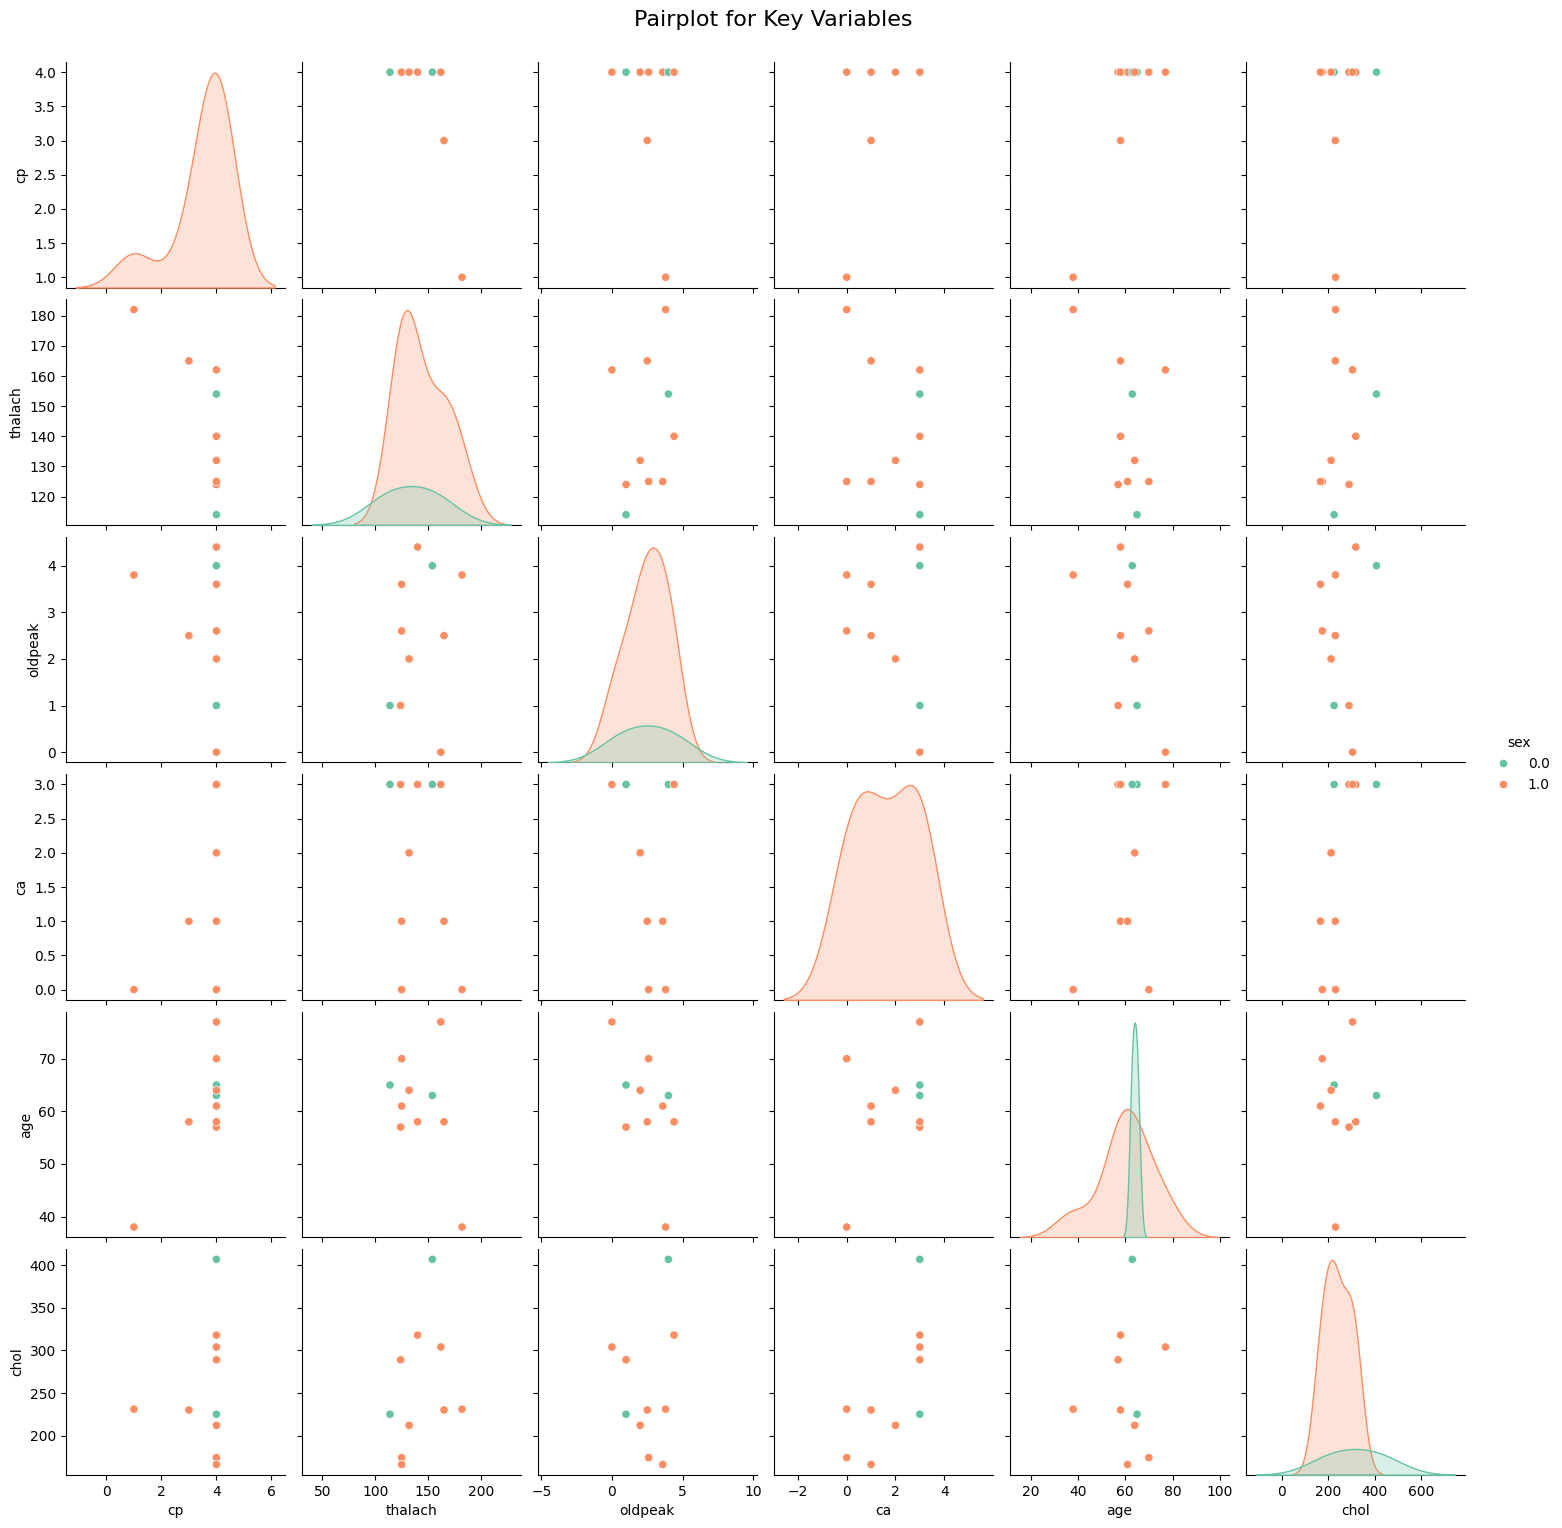

In [72]:
sns.pairplot(
    filtered_data_5,
    vars=['cp', 'thalach', 'oldpeak', 'ca', 'age', 'chol'],
    diag_kind='kde',
    hue='sex',
    palette='Set2'
)
plt.suptitle('Pairplot for Key Variables', y=1.02, fontsize=16)
plt.show()
